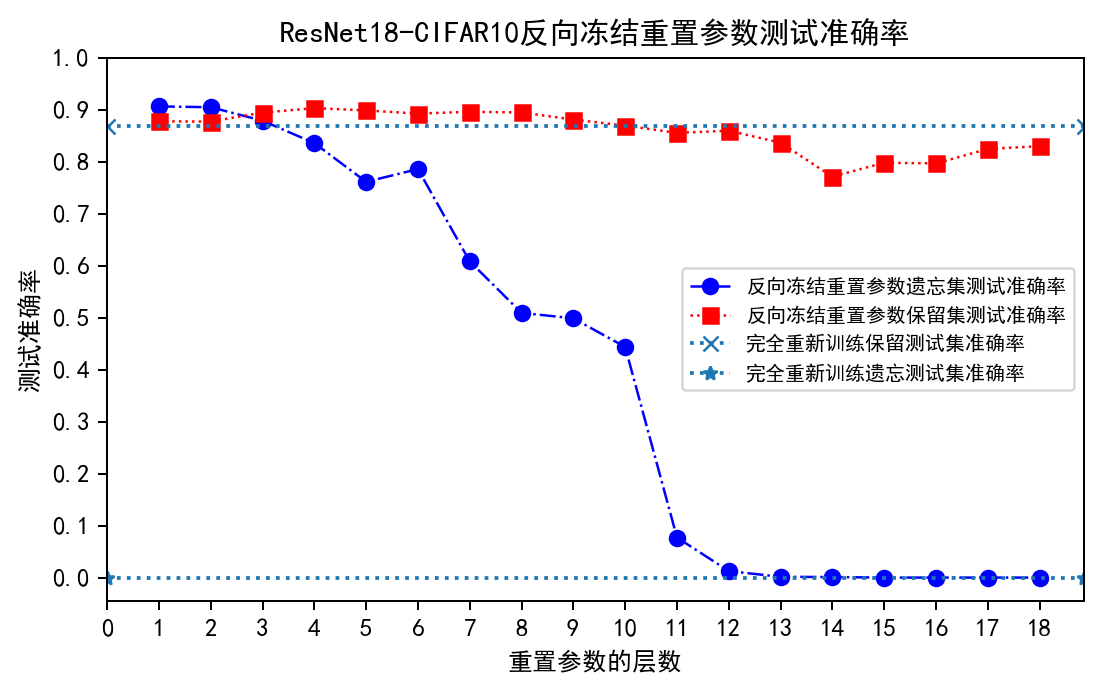

In [15]:
# resnet18 cifar10 反向冻结保留集和遗忘集准确率曲线
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('测试准确率')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10反向冻结重置参数测试准确率")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

reverse_reset_freeze_forget_acc = [
    90.600,90.450,87.850,83.550,76.100,78.550,
    60.800,50.900,49.850,44.350,7.700,1.250,
    0.150,0.100,0.000,0.000,0.000,0.000,
]
reverse_reset_freeze_retain_acc = [
    87.738,87.688,89.413,90.275,89.825,89.225,
    89.563,89.438,88.075,86.913,85.513,85.925,
    83.625,77.088,79.775,79.638,82.425,82.963,
]

retrain_retain_acc = 0.86788
retrain_forget_acc = 0.

CN = np.array(reverse_reset_freeze_forget_acc)
CN = np.divide(CN, np.array(100.))
SN = np.array(reverse_reset_freeze_retain_acc)
SN = np.divide(SN, np.array(100.))

plt.plot(X, CN, marker='o', linewidth=1, linestyle="dashdot",color='b', label="反向冻结重置参数遗忘集测试准确率")
plt.plot(X, SN, marker='s', linewidth=1, linestyle="dotted", color='r', label="反向冻结重置参数保留集测试准确率")
plt.axhline(y=retrain_retain_acc, marker='x',linestyle='dotted', label='完全重新训练保留测试集准确率')
plt.axhline(y=retrain_forget_acc, marker='*',linestyle='dotted', label='完全重新训练遗忘测试集准确率')
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,1,11,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetcifar_reverse_acc.png",dpi=272)
plt.show()

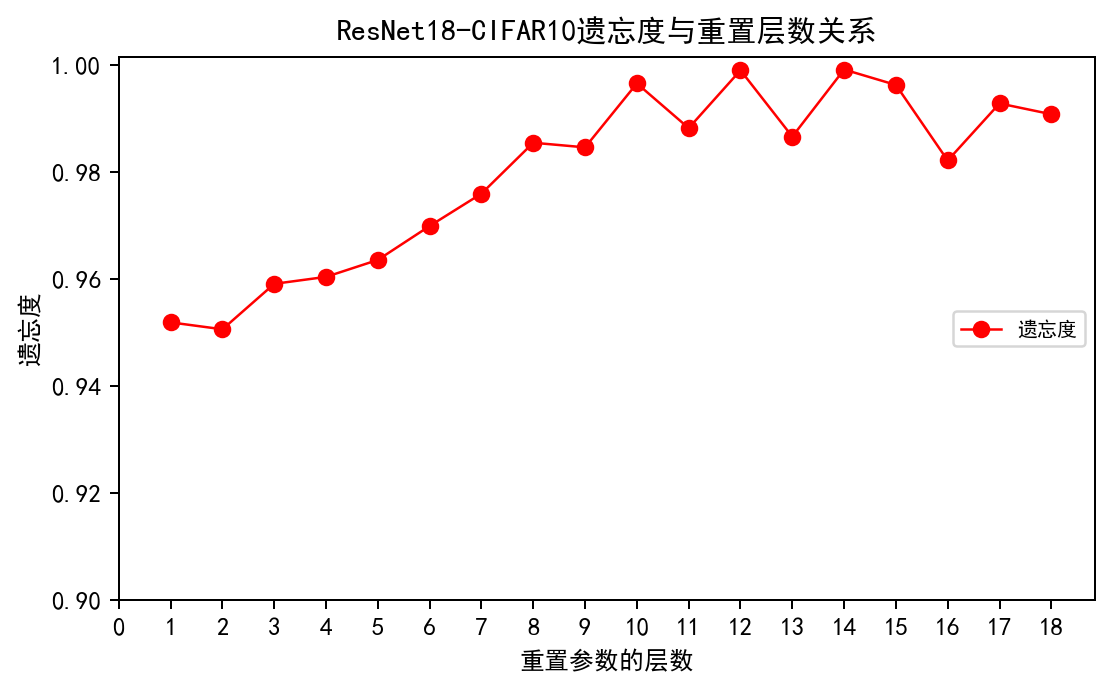

In [2]:
# resnet18 cifar10 lrf遗忘度曲线

import numpy as np
import matplotlib.pyplot as plt
from common.utils import calcForgetPercent

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('遗忘度')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘度与重置层数关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

reset_freeze_forget_acc = [
    0,0,0,0,0,0,
    0,0,0,0,0,0,
    0,0,0,0,0,0,
]
reset_freeze_retain_acc = [
    90.963,91.075,90.338,90.225,89.950,89.400,
    88.875,88.050,88.125,87.088,87.813,86.875,
    85.625,86.863,86.463,85.238,86.163,85.988,
]

retrain_retain_acc = 0.86788
retrain_forget_acc = 0.

lrfForgetPercent = calcForgetPercent(reset_freeze_forget_acc, reset_freeze_retain_acc, retrain_forget_acc, retrain_retain_acc)
F = np.array(lrfForgetPercent)

plt.plot(X, F,  marker='o',linewidth=1, linestyle="solid", color='r', label="遗忘度")
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0.9,1,6,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetcifar_lrf_forget_percent.png",dpi=272)
plt.show()


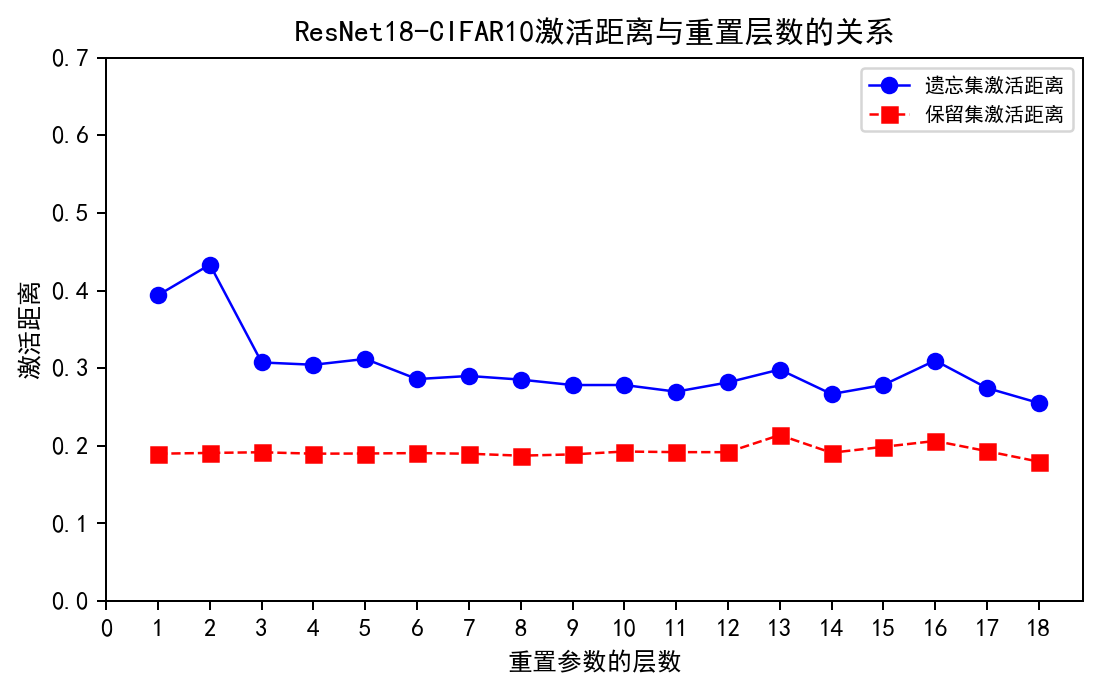

In [3]:
# resnet18 cifar10 LRF激活距离曲线
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('激活距离')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10激活距离与重置层数的关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)
reset_freeze_active_distance_forget = [
    0.39400886,0.43335699,0.30737236,0.30437928,0.31189944,0.28594436,
    0.28996952,0.28526215,0.27826825,0.27832415,0.26973126,0.28166712,
    0.29825133,0.26666156,0.27837702,0.30985463,0.27445369,0.25519231,
]
reset_freeze_active_distance_retain = [
    0.18986267,0.19087424,0.19172060,0.18989651,0.19011170,0.19065930,
    0.18983096,0.18732828,0.18896693,0.19266102,0.19188603,0.19184597,
    0.21388821,0.19108589,0.19868527,0.20626073,0.19314007,0.17963358,
]
C = np.array(reset_freeze_active_distance_forget)
S = np.array(reset_freeze_active_distance_retain)

plt.plot(X, C, marker='o',linewidth=1, linestyle="solid",color='b', label="遗忘集激活距离")
plt.plot(X, S, marker='s',linewidth=1, linestyle="dashed",color='r', label="保留集激活距离")

plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,0.7,8,endpoint=True))

plt.legend(fontsize=8)
plt.savefig("./figures/chapter4_resnetcifar_lrf_distance.png",dpi=272)
plt.show()


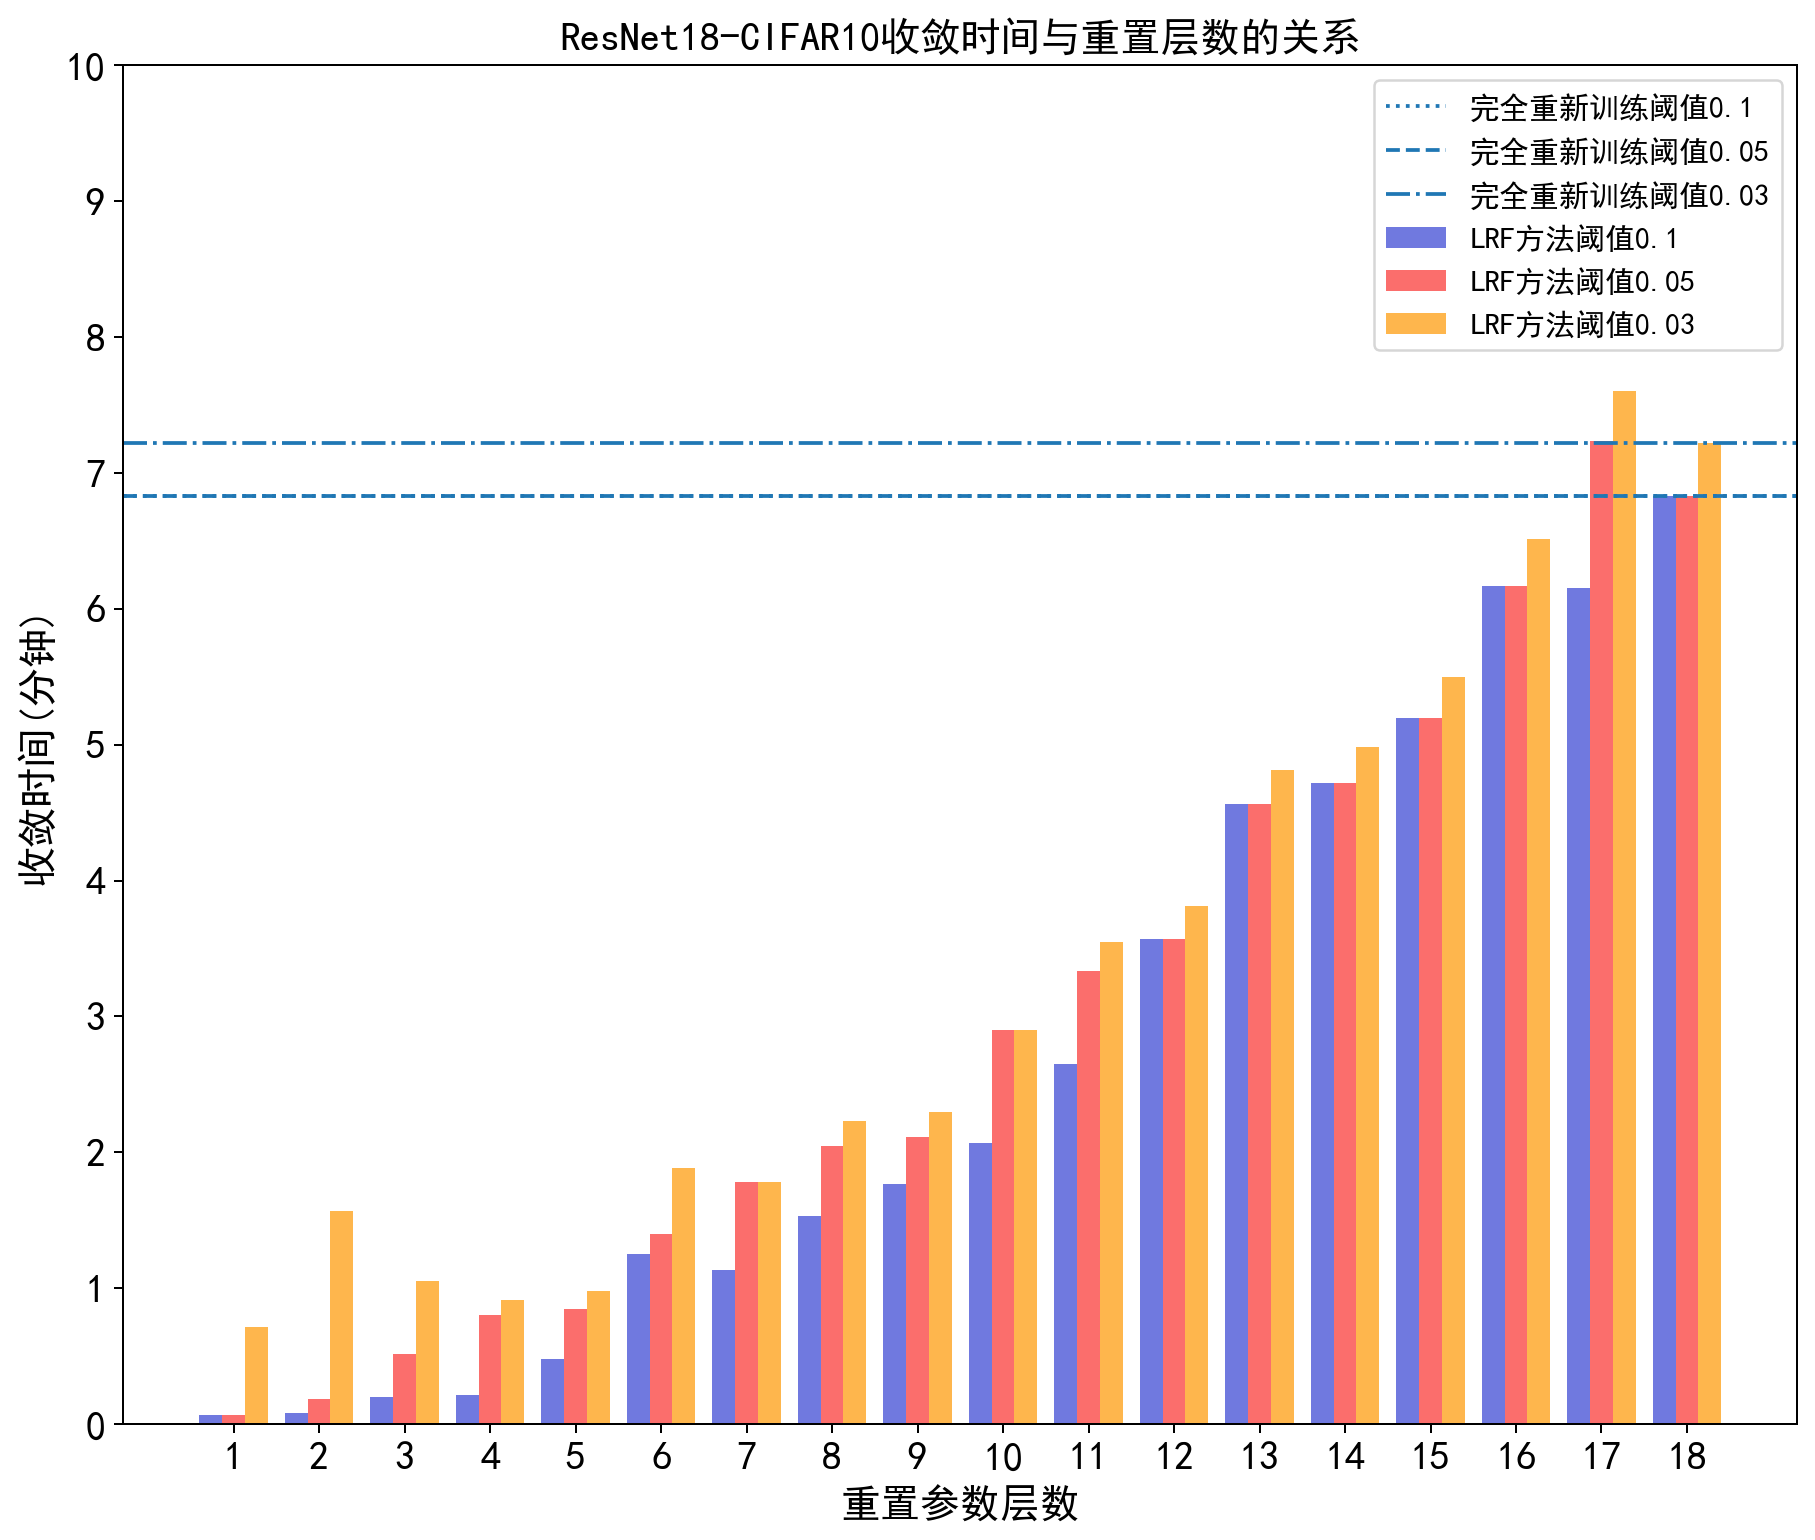

In [4]:
# resnet18 cifar10 LRF收敛时间曲线
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10收敛时间与重置层数的关系", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
resnet_cifar_retrain_time = ['2021-03-22 16:07:30','2021-03-22 16:14:20','2021-03-22 16:14:20','2021-03-22 16:14:43']

resnet_cifar_lrf_time = [
    ['2021-03-22 14:25:05','2021-03-22 14:25:09','2021-03-22 14:25:09','2021-03-22 14:25:48'],
    ['2021-03-22 14:27:53','2021-03-22 14:27:58','2021-03-22 14:28:04','2021-03-22 14:29:27'],
    ['2021-03-22 14:30:52','2021-03-22 14:31:04','2021-03-22 14:31:23','2021-03-22 14:31:55'],
    ['2021-03-22 14:34:04','2021-03-22 14:34:17','2021-03-22 14:34:52','2021-03-22 14:34:59'],
    ['2021-03-22 14:37:33','2021-03-22 14:38:02','2021-03-22 14:38:24','2021-03-22 14:38:32'],
    ['2021-03-22 14:41:16','2021-03-22 14:42:31','2021-03-22 14:42:40','2021-03-22 14:43:09'],
    ['2021-03-22 14:46:01','2021-03-22 14:47:09','2021-03-22 14:47:48','2021-03-22 14:47:48'],
    ['2021-03-22 14:50:56','2021-03-22 14:52:28','2021-03-22 14:52:59','2021-03-22 14:53:10'],
    ['2021-03-22 14:56:07','2021-03-22 14:57:53','2021-03-22 14:58:14','2021-03-22 14:58:25'],
    ['2021-03-22 15:01:29','2021-03-22 15:03:33','2021-03-22 15:04:23','2021-03-22 15:04:23'],
    ['2021-03-22 15:07:45','2021-03-22 15:10:24','2021-03-22 15:11:05','2021-03-22 15:11:18'],
    ['2021-03-22 15:14:26','2021-03-22 15:18:00','2021-03-22 15:18:00','2021-03-22 15:18:15'],
    ['2021-07-10 19:31:13','2021-07-10 19:35:47','2021-07-10 19:35:47','2021-07-10 19:36:02'],
    ['2021-03-22 15:29:01','2021-03-22 15:33:44','2021-03-22 15:33:44','2021-03-22 15:34:00'],
    ['2021-03-22 15:37:22','2021-03-22 15:42:34','2021-03-22 15:42:34','2021-03-22 15:42:52'],
    ['2021-07-10 19:36:19','2021-07-10 19:42:29','2021-07-10 19:42:29','2021-07-10 19:42:50'],
    ['2021-03-22 15:56:37','2021-03-22 16:02:46','2021-03-22 16:03:51','2021-03-22 16:04:13'],
    ['2021-03-22 16:07:30','2021-03-22 16:14:20','2021-03-22 16:14:20','2021-03-22 16:14:43'],
]

times01 = []
times005 = []
times003 = []
spanS = []
for i in range(len(resnet_cifar_lrf_time)):
    time1 = datetime.strptime(resnet_cifar_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

retrainTime1 = datetime.strptime(resnet_cifar_retrain_time[0], "%Y-%m-%d %H:%M:%S")
retrainTime2 = datetime.strptime(resnet_cifar_retrain_time[1], "%Y-%m-%d %H:%M:%S")
retrainTime3 = datetime.strptime(resnet_cifar_retrain_time[2], "%Y-%m-%d %H:%M:%S")
retrainTime4 = datetime.strptime(resnet_cifar_retrain_time[3], "%Y-%m-%d %H:%M:%S")
timeDelta1 = retrainTime2 - retrainTime1
timeDelta2 = retrainTime3 - retrainTime1
timeDelta3 = retrainTime4 - retrainTime1

size = len(resnet_cifar_lrf_time)
x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1', color='#7079DF')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05', color='#FB6E6C')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03', color='#FEB64D')
plt.axhline(y=timeDelta1.seconds / 60, linestyle='dotted', label='完全重新训练阈值0.1')
plt.axhline(y=timeDelta2.seconds / 60, linestyle='dashed', label='完全重新训练阈值0.05')
plt.axhline(y=timeDelta3.seconds / 60, linestyle='dashdot', label='完全重新训练阈值0.03')
plt.xticks(np.linspace(1,18,18,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,10,11,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_resnetcifar_lrf_time.png",dpi=272)
plt.show()


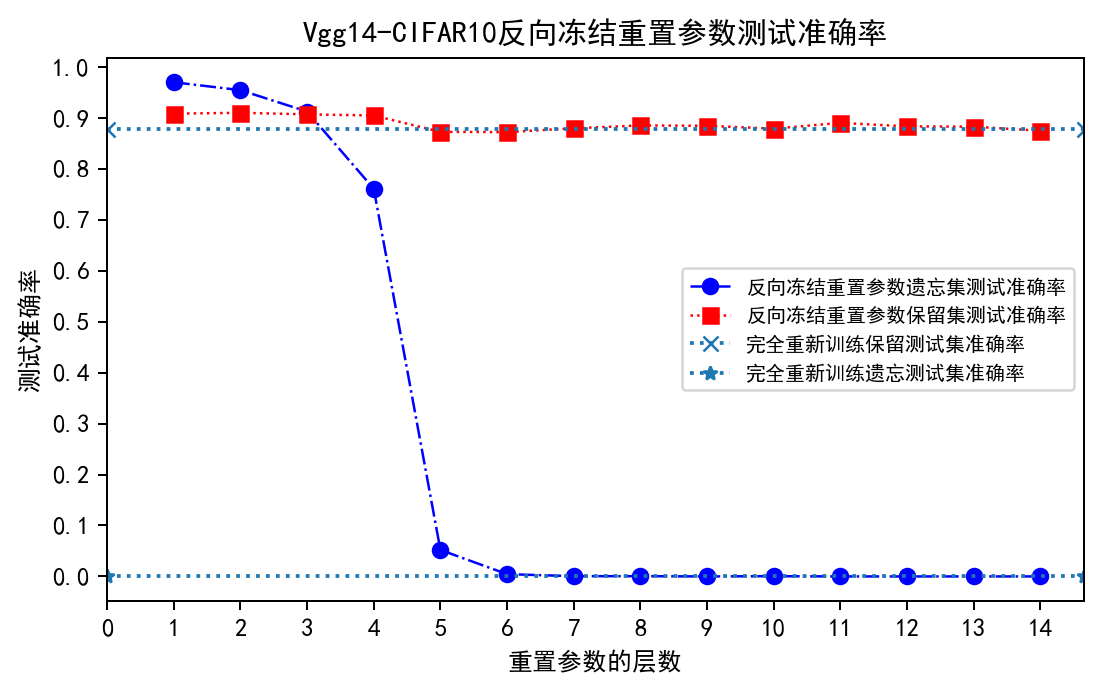

In [5]:
# vgg14 cifar10 反向冻结保留集和遗忘集准确率曲线
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('测试准确率')  # Add a y-label to the axes.
ax.set_title("Vgg14-CIFAR10反向冻结重置参数测试准确率")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 14, 14, endpoint=True)

vgg_reverse_reset_freeze_forget_acc = [
    97.000,95.450,91.250,76.100,5.200,0.450,
    0.050,0.050,0.000,0.050,0.000,0.000,
    0.000,0.000,
]
vgg_reverse_reset_freeze_retain_acc = [
    90.838,91.000,90.700,90.475,87.263,87.213,
    87.963,88.525,88.450,87.900,89.025,88.338,
    88.288,87.475,
]

retrain_retain_acc = 0.87738
retrain_forget_acc = 0.

CN = np.array(vgg_reverse_reset_freeze_forget_acc)
CN = np.divide(CN, np.array(100.))
SN = np.array(vgg_reverse_reset_freeze_retain_acc)
SN = np.divide(SN, np.array(100.))

plt.plot(X, CN, marker='o', linewidth=1, linestyle="dashdot",color='b', label="反向冻结重置参数遗忘集测试准确率")
plt.plot(X, SN, marker='s', linewidth=1, linestyle="dotted", color='r', label="反向冻结重置参数保留集测试准确率")
plt.axhline(y=retrain_retain_acc, marker='x',linestyle='dotted', label='完全重新训练保留测试集准确率')
plt.axhline(y=retrain_forget_acc, marker='*',linestyle='dotted', label='完全重新训练遗忘测试集准确率')
plt.xticks(np.linspace(0,14,15,endpoint=True))
plt.yticks(np.linspace(0,1,11,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_vggcifar_reverse_acc.png",dpi=272)
plt.show()


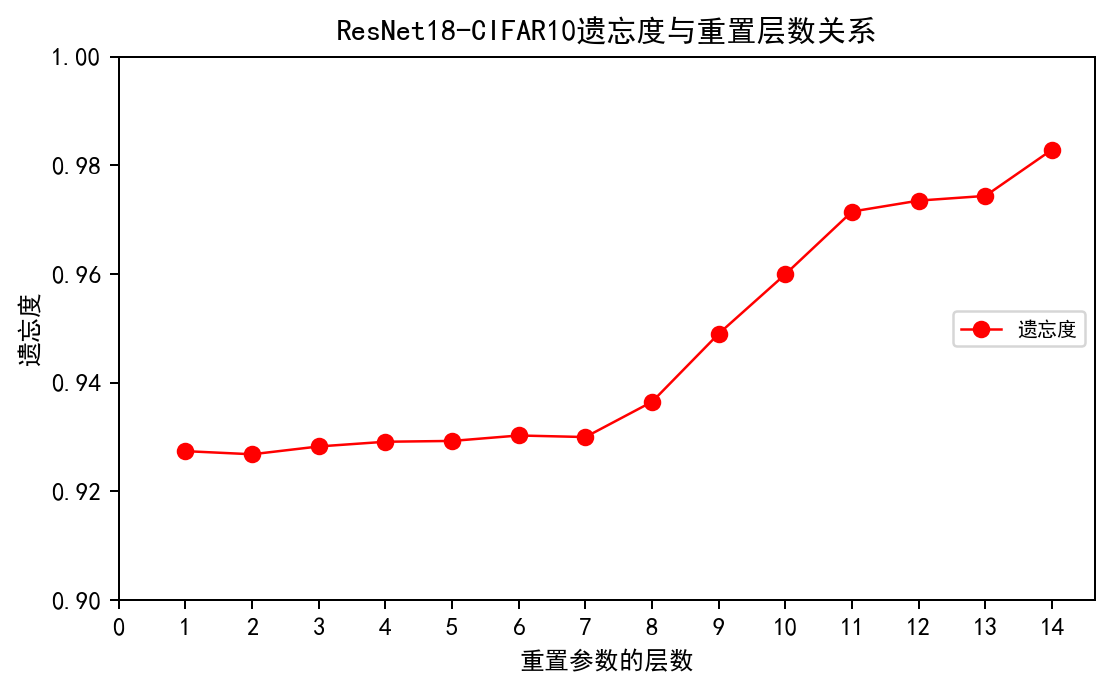

In [6]:
# vgg14 cifar10 lrf遗忘度曲线

import numpy as np
import matplotlib.pyplot as plt
from common.utils import calcForgetPercent

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('遗忘度')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘度与重置层数关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 14, 14, endpoint=True)

vgg_reset_freeze_forget_acc = [
    0,0,0,0,0,0,
    0,0,0,0,0,0,
    0,0,
]
vgg_reset_freeze_retain_acc = [
    93.088,93.138,93.013,92.938,92.925,
    92.838,92.863,92.300,91.213,90.263,
    89.263,89.088,89.013,88.275,
]

vgg_retrain_retain_acc = 0.86788
vgg_retrain_forget_acc = 0.

lrfForgetPercent = calcForgetPercent(vgg_reset_freeze_forget_acc, vgg_reset_freeze_retain_acc, vgg_retrain_forget_acc, vgg_retrain_retain_acc)
F = np.array(lrfForgetPercent)

plt.plot(X, F,  marker='o',linewidth=1, linestyle="solid", color='r', label="遗忘度")
plt.xticks(np.linspace(0,14,15,endpoint=True))
plt.yticks(np.linspace(0.9,1,6,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_vggcifar_lrf_forget_percent.png",dpi=272)
plt.show()

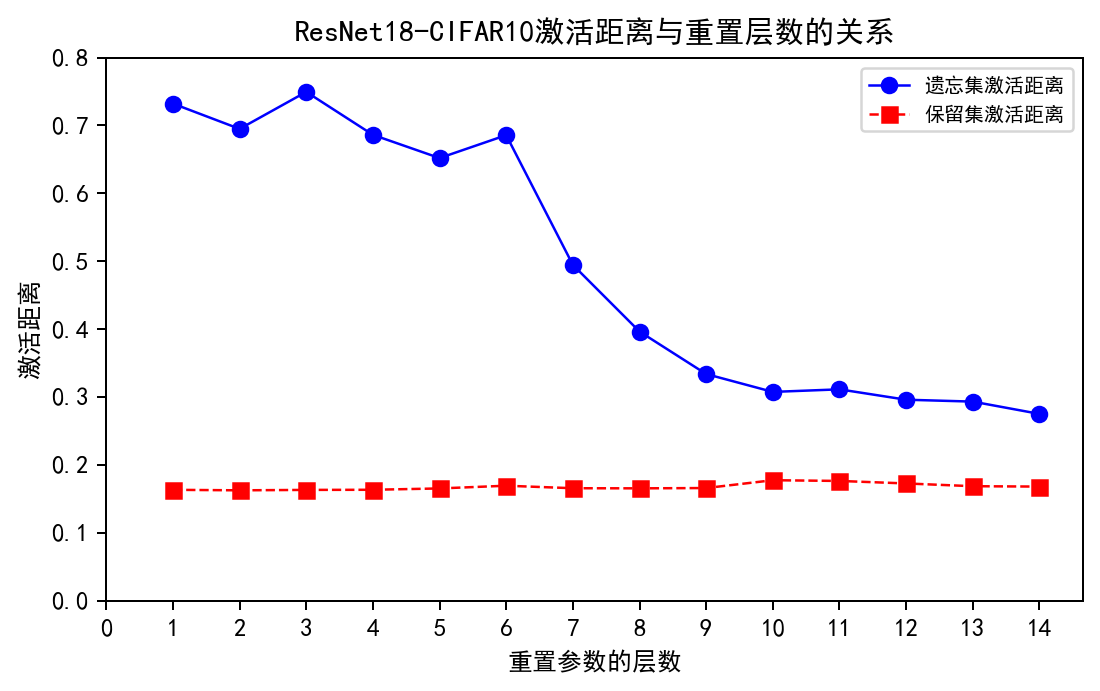

In [7]:
# vgg14 cifar10 LRF激活距离曲线
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('激活距离')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10激活距离与重置层数的关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 14, 14, endpoint=True)
vgg_reset_freeze_active_distance_forget = [
    0.73220093,0.69499235,0.74946424,0.68625975,0.65204550,0.68576976,
    0.49484459,0.39674570,0.33421127,0.30792134,0.31170716,0.29642430,
   0.29365032,0.27553453,
]
vgg_reset_freeze_active_distance_retain = [
    0.16383080,0.16308976,0.16370659,0.16389539,0.16585604,0.16986630,
    0.16617447,0.16599608,0.16645263,0.17795798,0.17688520,0.17320411,
    0.16914282,0.16858779,
]
C = np.array(vgg_reset_freeze_active_distance_forget)
S = np.array(vgg_reset_freeze_active_distance_retain)

plt.plot(X, C, marker='o',linewidth=1, linestyle="solid",color='b', label="遗忘集激活距离")
plt.plot(X, S, marker='s',linewidth=1, linestyle="dashed",color='r', label="保留集激活距离")

plt.xticks(np.linspace(0,14,15,endpoint=True))
plt.yticks(np.linspace(0,0.8,9,endpoint=True))

plt.legend(fontsize=8)
plt.savefig("./figures/chapter4_vggcifar_lrf_distance.png",dpi=272)
plt.show()


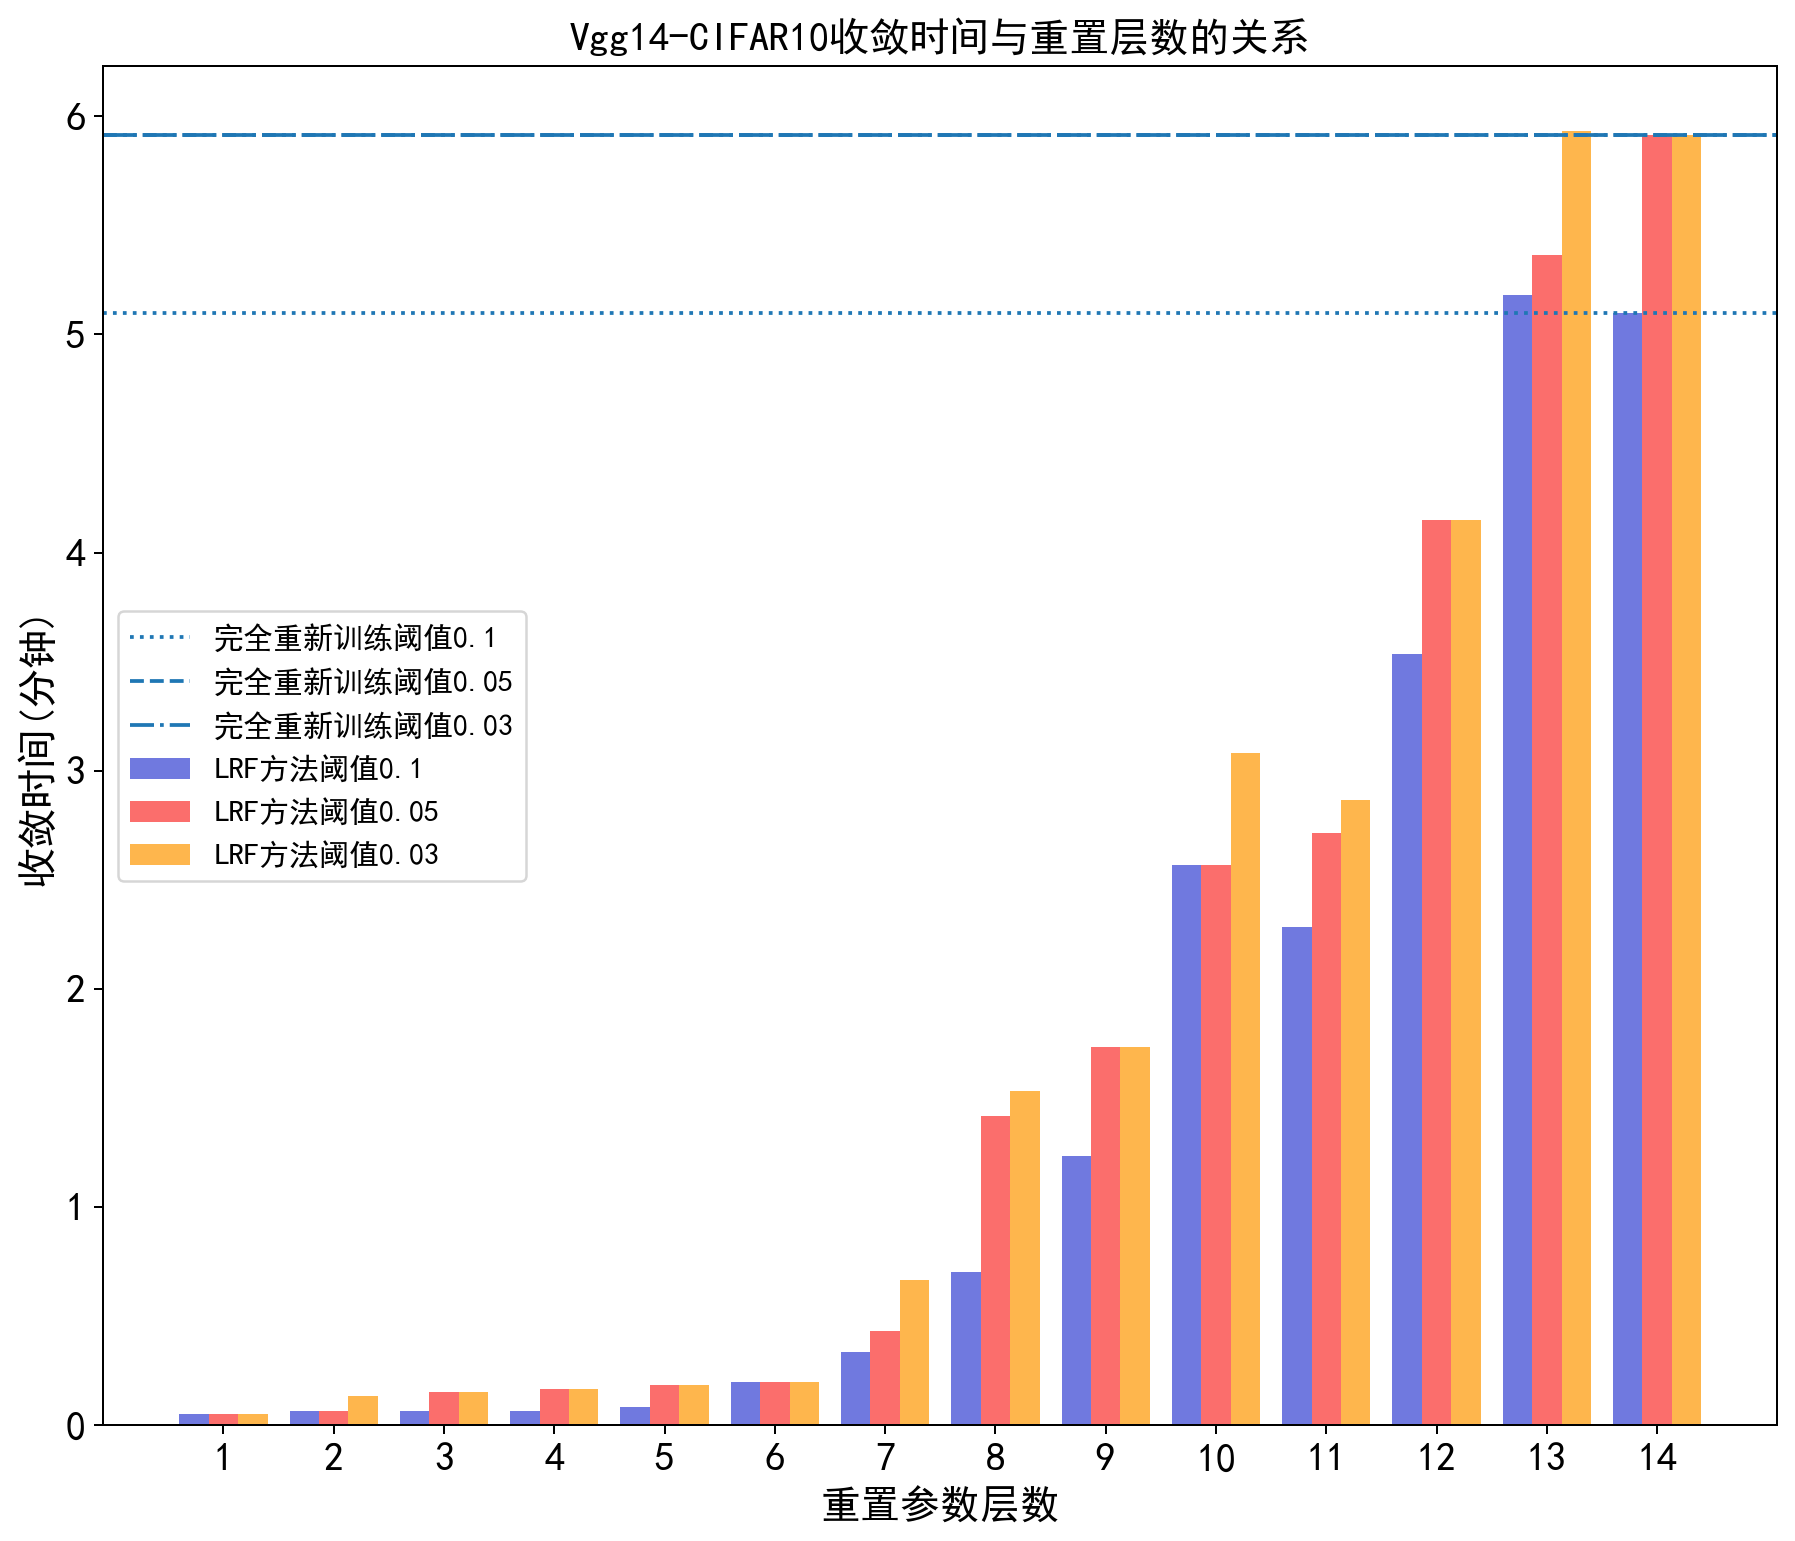

In [8]:
# vgg14 cifar10 LRF收敛时间曲线
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("Vgg14-CIFAR10收敛时间与重置层数的关系", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
vgg_cifar_retrain_time = ['2021-04-29 13:36:51','2021-04-29 13:41:57','2021-04-29 13:42:46','2021-04-29 13:42:46']

vgg_cifar_lrf_time = [
    ['2021-04-29 12:07:32','2021-04-29 12:07:35','2021-04-29 12:07:35','2021-04-29 12:07:35'],
    ['2021-04-29 12:11:37','2021-04-29 12:11:41','2021-04-29 12:11:41','2021-04-29 12:11:45'],
    ['2021-04-29 12:16:07','2021-04-29 12:16:11','2021-04-29 12:16:16','2021-04-29 12:16:16'],
    ['2021-04-29 12:21:03','2021-04-29 12:21:07','2021-04-29 12:21:13','2021-04-29 12:21:13'],
    ['2021-04-29 12:26:26','2021-04-29 12:26:31','2021-04-29 12:26:37','2021-04-29 12:26:37'],
    ['2021-04-29 12:32:20','2021-04-29 12:32:32','2021-04-29 12:32:32','2021-04-29 12:32:32'],
    ['2021-04-29 12:38:44','2021-04-29 12:39:04','2021-04-29 12:39:10','2021-04-29 12:39:24'],
    ['2021-04-29 12:45:29','2021-04-29 12:46:11','2021-04-29 12:46:54','2021-04-29 12:47:01'],
    ['2021-04-29 12:52:35','2021-04-29 12:53:49','2021-04-29 12:54:19','2021-04-29 12:54:19'],
    ['2021-04-29 13:00:03','2021-04-29 13:02:37','2021-04-29 13:02:37','2021-04-29 13:03:08'],
    ['2021-04-29 13:07:48','2021-04-29 13:10:05','2021-04-29 13:10:31','2021-04-29 13:10:40'],
    ['2021-04-29 13:16:26','2021-04-29 13:19:58','2021-04-29 13:20:35','2021-04-29 13:20:35'],
    ['2021-04-29 13:25:42','2021-04-29 13:30:53','2021-04-29 13:31:04','2021-04-29 13:31:38'],
    ['2021-04-29 13:36:51','2021-04-29 13:41:57','2021-04-29 13:42:46','2021-04-29 13:42:46'],
]

times01 = []
times005 = []
times003 = []
spanS = []
for i in range(len(vgg_cifar_lrf_time)):
    time1 = datetime.strptime(vgg_cifar_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(vgg_cifar_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(vgg_cifar_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(vgg_cifar_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

retrainTime1 = datetime.strptime(vgg_cifar_retrain_time[0], "%Y-%m-%d %H:%M:%S")
retrainTime2 = datetime.strptime(vgg_cifar_retrain_time[1], "%Y-%m-%d %H:%M:%S")
retrainTime3 = datetime.strptime(vgg_cifar_retrain_time[2], "%Y-%m-%d %H:%M:%S")
retrainTime4 = datetime.strptime(vgg_cifar_retrain_time[3], "%Y-%m-%d %H:%M:%S")
timeDelta1 = retrainTime2 - retrainTime1
timeDelta2 = retrainTime3 - retrainTime1
timeDelta3 = retrainTime4 - retrainTime1

size = len(vgg_cifar_lrf_time)
x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1', color='#7079DF')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05', color='#FB6E6C')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03', color='#FEB64D')
plt.axhline(y=timeDelta1.seconds / 60, linestyle='dotted', label='完全重新训练阈值0.1')
plt.axhline(y=timeDelta2.seconds / 60, linestyle='dashed', label='完全重新训练阈值0.05')
plt.axhline(y=timeDelta3.seconds / 60, linestyle='dashdot', label='完全重新训练阈值0.03')
plt.xticks(np.linspace(1,14,14,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,6,7,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_vggcifar_lrf_time.png",dpi=272)
plt.show()

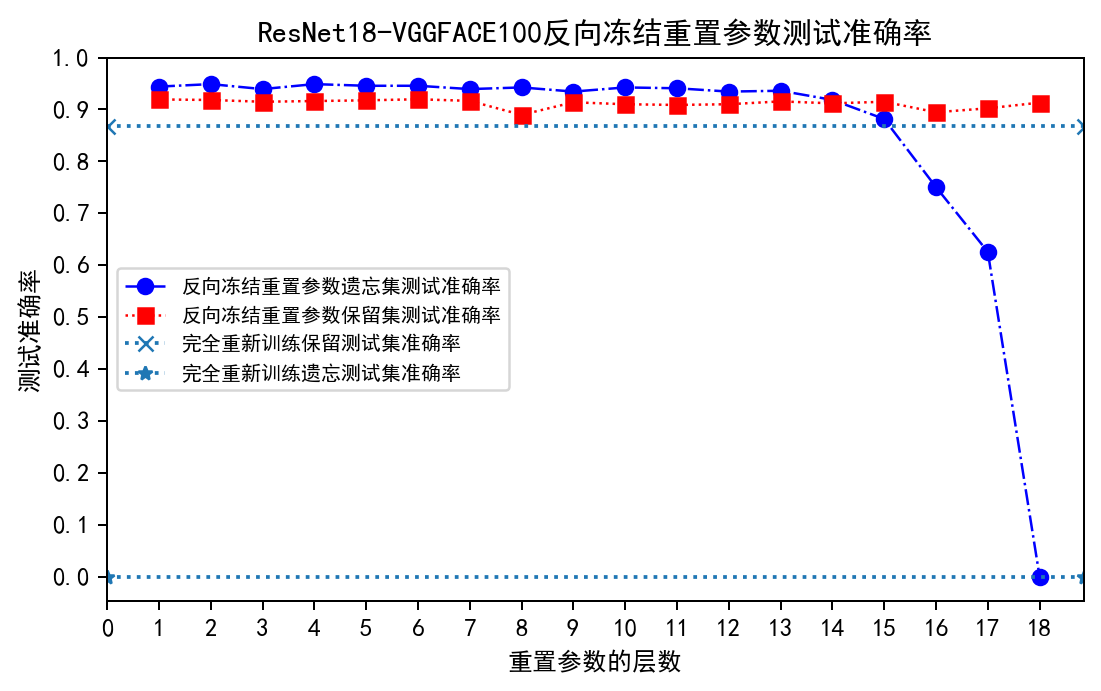

In [9]:
# resnet18 cifar10 反向冻结保留集和遗忘集准确率曲线
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('测试准确率')  # Add a y-label to the axes.
ax.set_title("ResNet18-VGGFACE100反向冻结重置参数测试准确率")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

resnet_vggface_reverse_forget_acc = [
    94.400,94.880,93.920,94.880,94.560,94.560,
    93.920,94.240,93.440,94.240,94.080,93.440,
    93.600,91.840,88.160,75.040,62.560,0.000,
]

resnet_vggface_reverse_retain_acc = [
    91.926,91.823,91.481,91.618,91.755,91.960,
    91.652,88.950,91.379,91.002,90.866,91.002,
    91.550,91.173,91.481,89.463,90.216,91.310,
]
retrain_retain_acc = 0.86788
retrain_forget_acc = 0.

CN = np.array(resnet_vggface_reverse_forget_acc)
CN = np.divide(CN, np.array(100.))
SN = np.array(resnet_vggface_reverse_retain_acc)
SN = np.divide(SN, np.array(100.))

plt.plot(X, CN, marker='o', linewidth=1, linestyle="dashdot",color='b', label="反向冻结重置参数遗忘集测试准确率")
plt.plot(X, SN, marker='s', linewidth=1, linestyle="dotted", color='r', label="反向冻结重置参数保留集测试准确率")
plt.axhline(y=retrain_retain_acc, marker='x',linestyle='dotted', label='完全重新训练保留测试集准确率')
plt.axhline(y=retrain_forget_acc, marker='*',linestyle='dotted', label='完全重新训练遗忘测试集准确率')
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,1,11,endpoint=True))

plt.legend(loc='center left',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetvggface_reverse_acc.png",dpi=272)
plt.show()



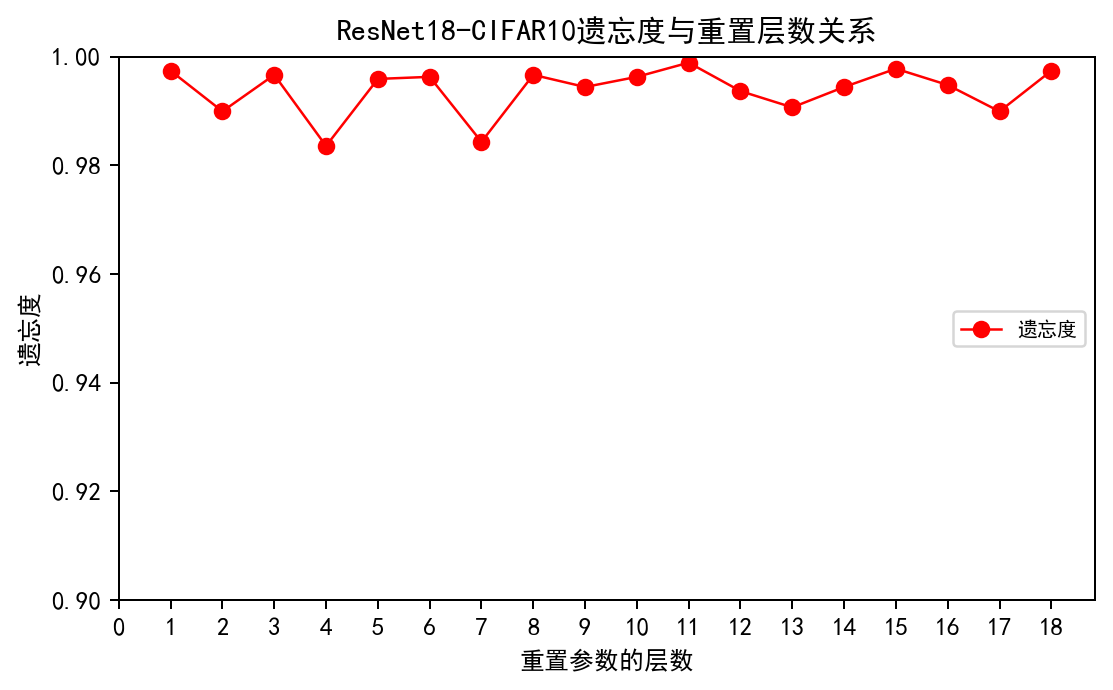

In [10]:
# resnet18 vggface100 lrf遗忘度曲线

import numpy as np
import matplotlib.pyplot as plt
from common.utils import calcForgetPercent

plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('遗忘度')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘度与重置层数关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)

resnet_vggface_lrf_forget_acc = [
    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
]

resnet_vggface_lrf_retain_acc = [
    91.310,92.473,91.242,90.044,91.173,91.208,
    90.113,91.242,92.063,91.892,91.447,90.968,
    90.694,91.037,91.755,91.071,90.626,91.310,
]

resnet_vggface_retrain_retain_acc = 0.9155
resnet_vggface_retrain_forget_acc = 0.

lrfForgetPercent = calcForgetPercent(resnet_vggface_lrf_forget_acc, resnet_vggface_lrf_retain_acc, resnet_vggface_retrain_forget_acc, resnet_vggface_retrain_retain_acc)
F = np.array(lrfForgetPercent)

plt.plot(X, F,  marker='o',linewidth=1, linestyle="solid", color='r', label="遗忘度")
plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0.9,1,6,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetvggface_lrf_forget_percent.png",dpi=272)
plt.show()

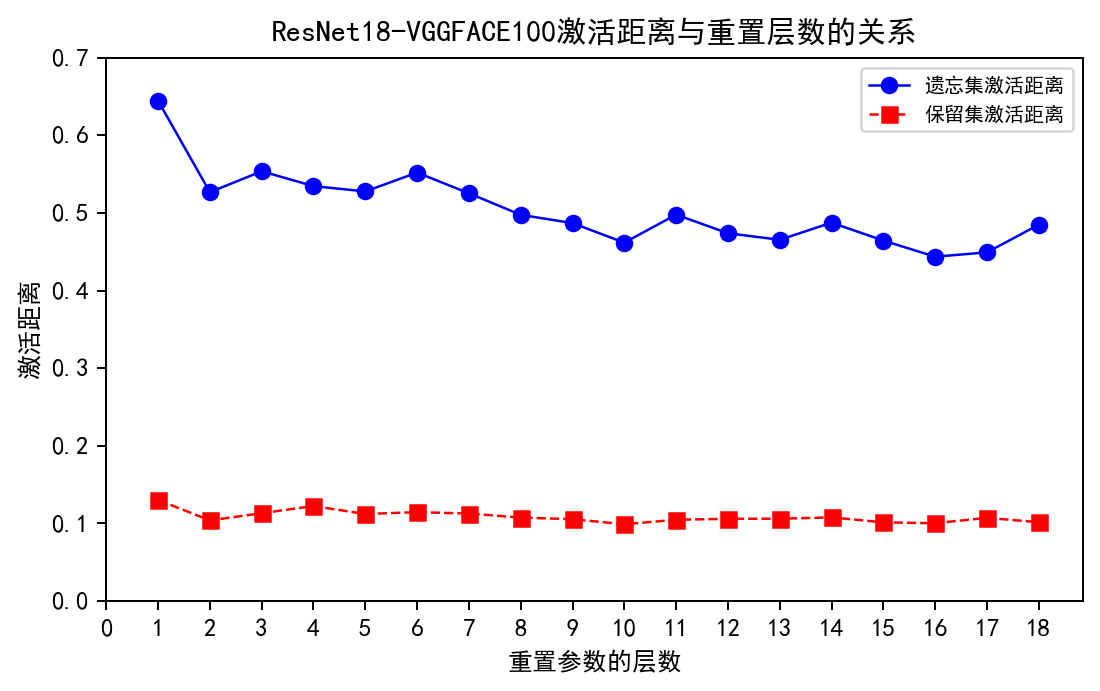

In [11]:
# resnet18 vggface100 LRF激活距离曲线
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数的层数')  # Add an x-label to the axes.
ax.set_ylabel('激活距离')  # Add a y-label to the axes.
ax.set_title("ResNet18-VGGFACE100激活距离与重置层数的关系")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 18, 18, endpoint=True)
resnet_vggface_lrf_forget_distance = [
    0.64438838,0.52660901,0.55354228,0.53446175,0.52757674,0.55186171,
    0.52518559,0.49749077,0.48678632,0.46162351,0.49772554,0.47374847,
    0.46529878,0.48736572,0.46431635,0.44352643,0.44913078,0.48470900,
]

resnet_vggface_lrf_retain_distance = [
    0.13032489,0.10396104,0.11321311,0.12247918,0.11220481,0.11458326,
    0.11279419,0.10759887,0.10553405,0.09898735,0.10479609,0.10602265,
    0.10614941,0.10784585,0.10144767,0.10032911,0.10731102,0.10158689,
]
C = np.array(resnet_vggface_lrf_forget_distance)
S = np.array(resnet_vggface_lrf_retain_distance)

plt.plot(X, C, marker='o',linewidth=1, linestyle="solid",color='b', label="遗忘集激活距离")
plt.plot(X, S, marker='s',linewidth=1, linestyle="dashed",color='r', label="保留集激活距离")

plt.xticks(np.linspace(0,18,19,endpoint=True))
plt.yticks(np.linspace(0,0.7,8,endpoint=True))

plt.legend(fontsize=8)
plt.savefig("./figures/chapter4_resnetvggface_lrf_distance.png",dpi=272)
plt.show()

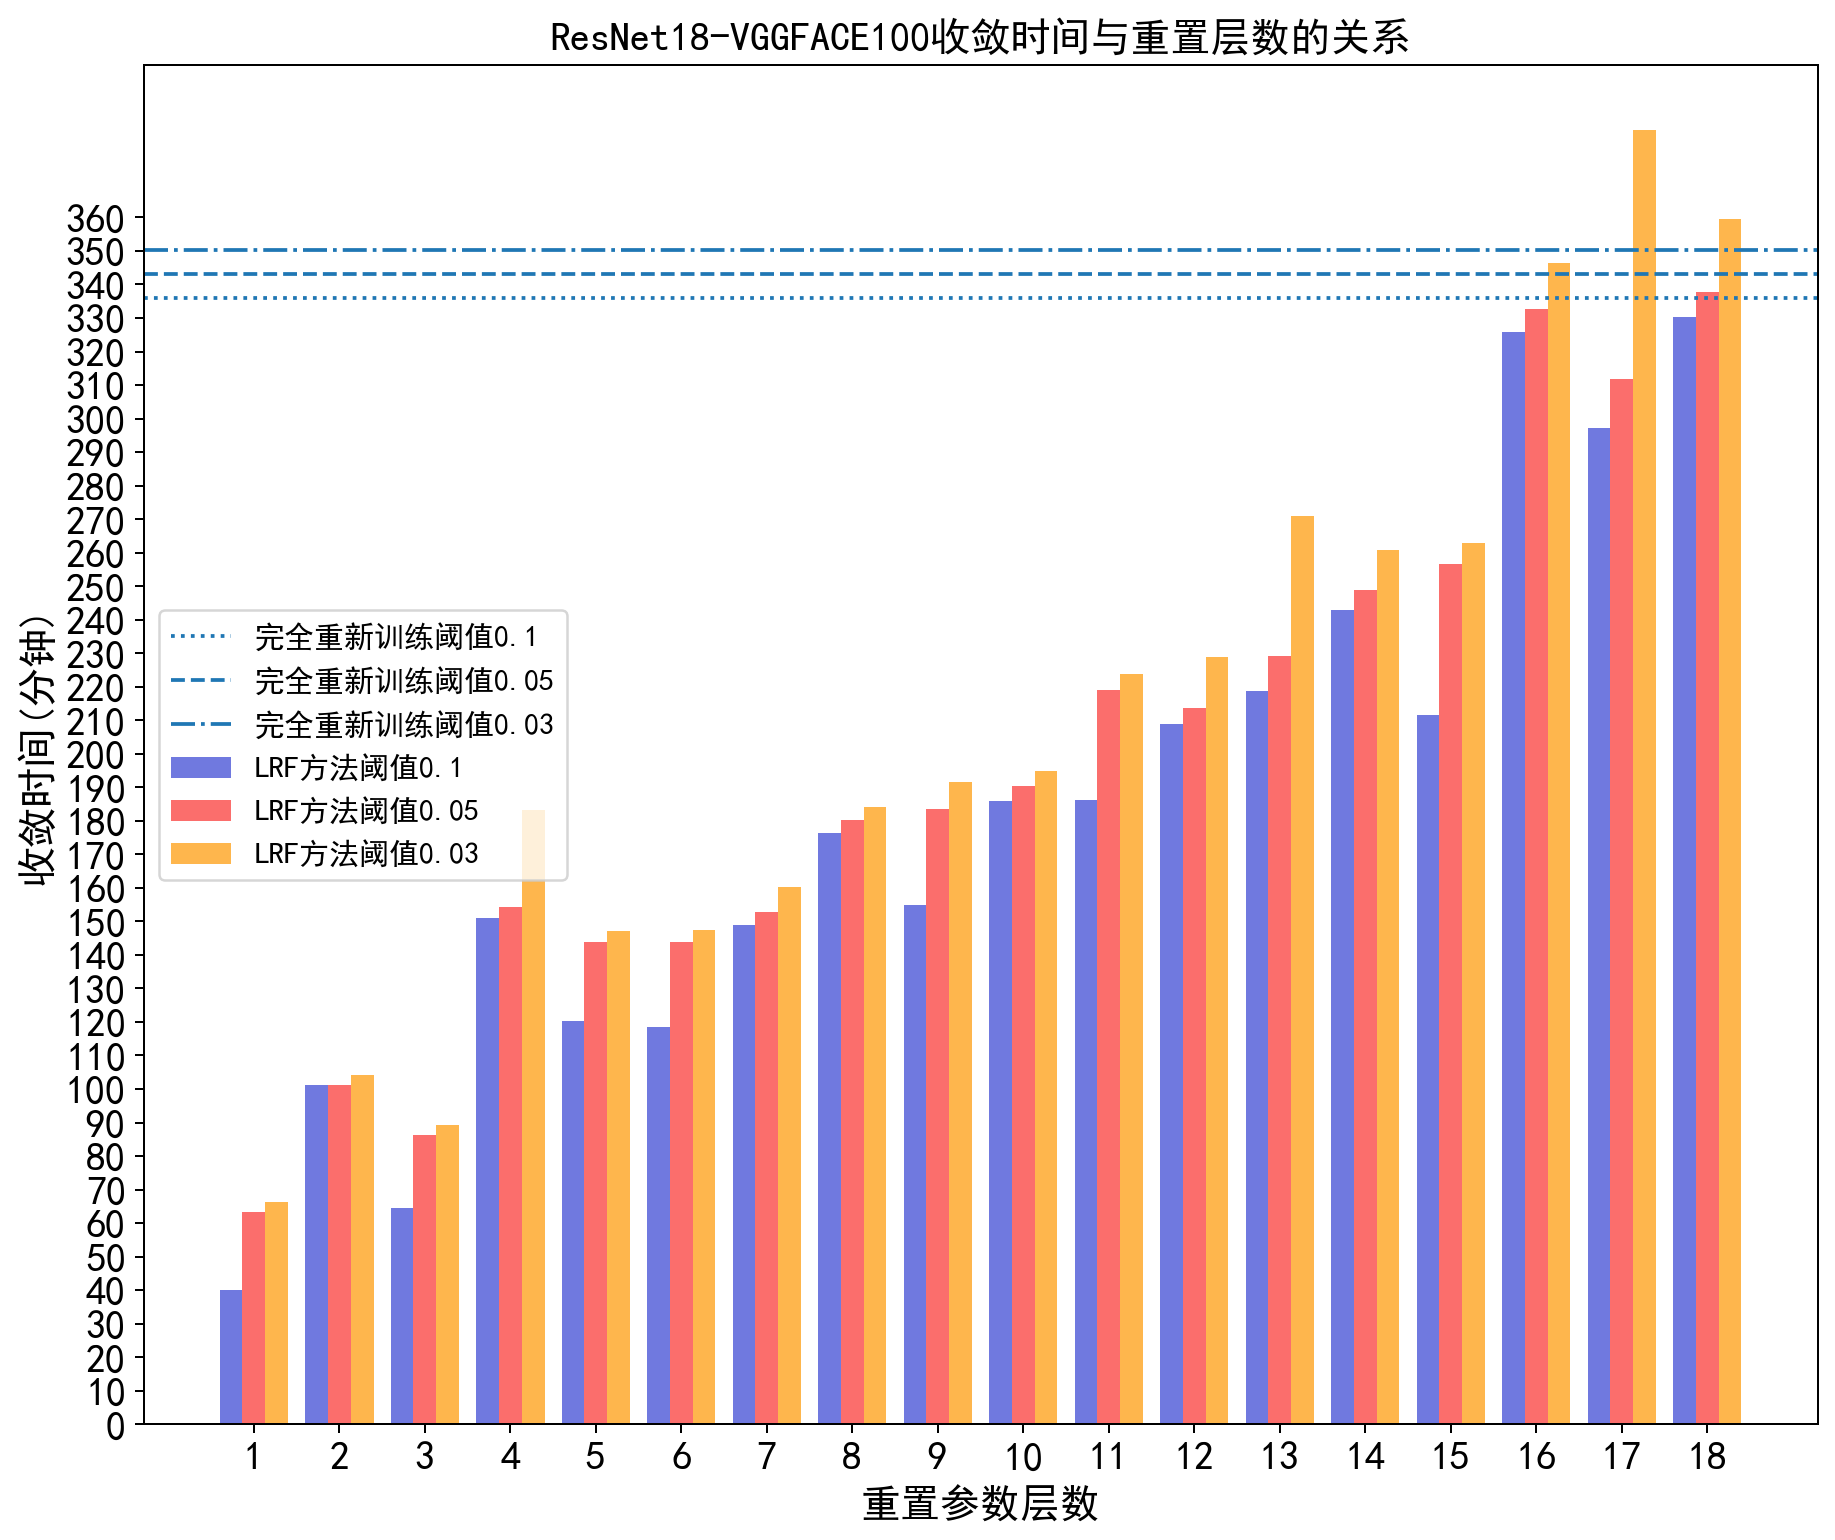

In [12]:

# resnet18 vggface100 LRF收敛时间曲线
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("ResNet18-VGGFACE100收敛时间与重置层数的关系", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']

resnet_vggface_retrain_time = ['2021-06-23 17:26:57','2021-06-23 23:03:02','2021-06-23 23:10:09','2021-06-23 23:17:17']

resnet_vggface_lrf_time = [
    ['2021-07-06 17:58:17','2021-07-06 18:38:19','2021-07-06 19:01:39','2021-07-06 19:04:34'],
    ['2021-07-06 19:16:56','2021-07-06 20:57:59','2021-07-06 20:57:59','2021-07-06 21:00:58'],
    ['2021-07-06 21:58:30','2021-07-06 23:02:56','2021-07-06 23:24:39','2021-07-06 23:27:44'],
    ['2021-07-07 00:05:38','2021-07-07 02:36:34','2021-07-07 02:39:48','2021-07-07 03:08:48'],
    ['2021-07-07 03:51:23','2021-07-07 05:51:38','2021-07-07 06:15:09','2021-07-07 06:18:31'],
    ['2021-07-07 07:09:38','2021-07-07 09:08:13','2021-07-07 09:33:31','2021-07-07 09:37:08'],
    ['2021-07-07 10:35:40','2021-07-07 13:04:36','2021-07-07 13:08:21','2021-07-07 13:15:50'],
    ['2021-07-07 13:50:13','2021-07-07 16:46:35','2021-07-07 16:50:31','2021-07-07 16:54:27'],
    ['2021-07-09 13:16:05','2021-07-09 15:50:55','2021-07-09 16:19:35','2021-07-09 16:27:47'],
    ['2021-07-09 17:25:49','2021-07-09 20:31:49','2021-07-09 20:36:16','2021-07-09 20:40:42'],
    ['2021-07-09 21:39:10','2021-07-10 00:45:28','2021-07-10 01:18:13','2021-07-10 01:22:54'],
    ['2021-07-10 02:29:08','2021-07-10 05:57:56','2021-07-10 06:02:56','2021-07-10 06:17:54'],
    ['2021-07-10 07:13:28','2021-07-10 10:52:17','2021-07-10 11:02:43','2021-07-10 11:44:31'],
    ['2021-07-10 12:58:20','2021-07-10 17:01:12','2021-07-10 17:07:09','2021-07-10 17:19:01'],
    ['2021-07-10 20:12:55','2021-07-10 23:44:33','2021-07-11 00:29:28','2021-07-11 00:35:53'],
    ['2021-07-11 01:59:57','2021-07-11 07:25:40','2021-07-11 07:32:35','2021-07-11 07:46:25'],
    ['2021-07-11 09:03:15','2021-07-11 14:00:20','2021-07-11 14:15:10','2021-07-11 15:29:22'],
    ['2021-07-08 11:42:07','2021-07-08 17:12:25','2021-07-08 17:19:45','2021-07-08 17:41:44'],
]


times01 = []
times005 = []
times003 = []
spanS = []
for i in range(len(resnet_vggface_lrf_time)):
    time1 = datetime.strptime(resnet_vggface_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_vggface_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_vggface_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_vggface_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

retrainTime1 = datetime.strptime(resnet_vggface_retrain_time[0], "%Y-%m-%d %H:%M:%S")
retrainTime2 = datetime.strptime(resnet_vggface_retrain_time[1], "%Y-%m-%d %H:%M:%S")
retrainTime3 = datetime.strptime(resnet_vggface_retrain_time[2], "%Y-%m-%d %H:%M:%S")
retrainTime4 = datetime.strptime(resnet_vggface_retrain_time[3], "%Y-%m-%d %H:%M:%S")
timeDelta1 = retrainTime2 - retrainTime1
timeDelta2 = retrainTime3 - retrainTime1
timeDelta3 = retrainTime4 - retrainTime1

size = len(resnet_vggface_lrf_time)
x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1', color='#7079DF')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05', color='#FB6E6C')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03', color='#FEB64D')
plt.axhline(y=timeDelta1.seconds / 60, linestyle='dotted', label='完全重新训练阈值0.1')
plt.axhline(y=timeDelta2.seconds / 60, linestyle='dashed', label='完全重新训练阈值0.05')
plt.axhline(y=timeDelta3.seconds / 60, linestyle='dashdot', label='完全重新训练阈值0.03')
plt.xticks(np.linspace(1,18,18,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,360,37,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_resnetvggface_lrf_time.png",dpi=272)
plt.show()

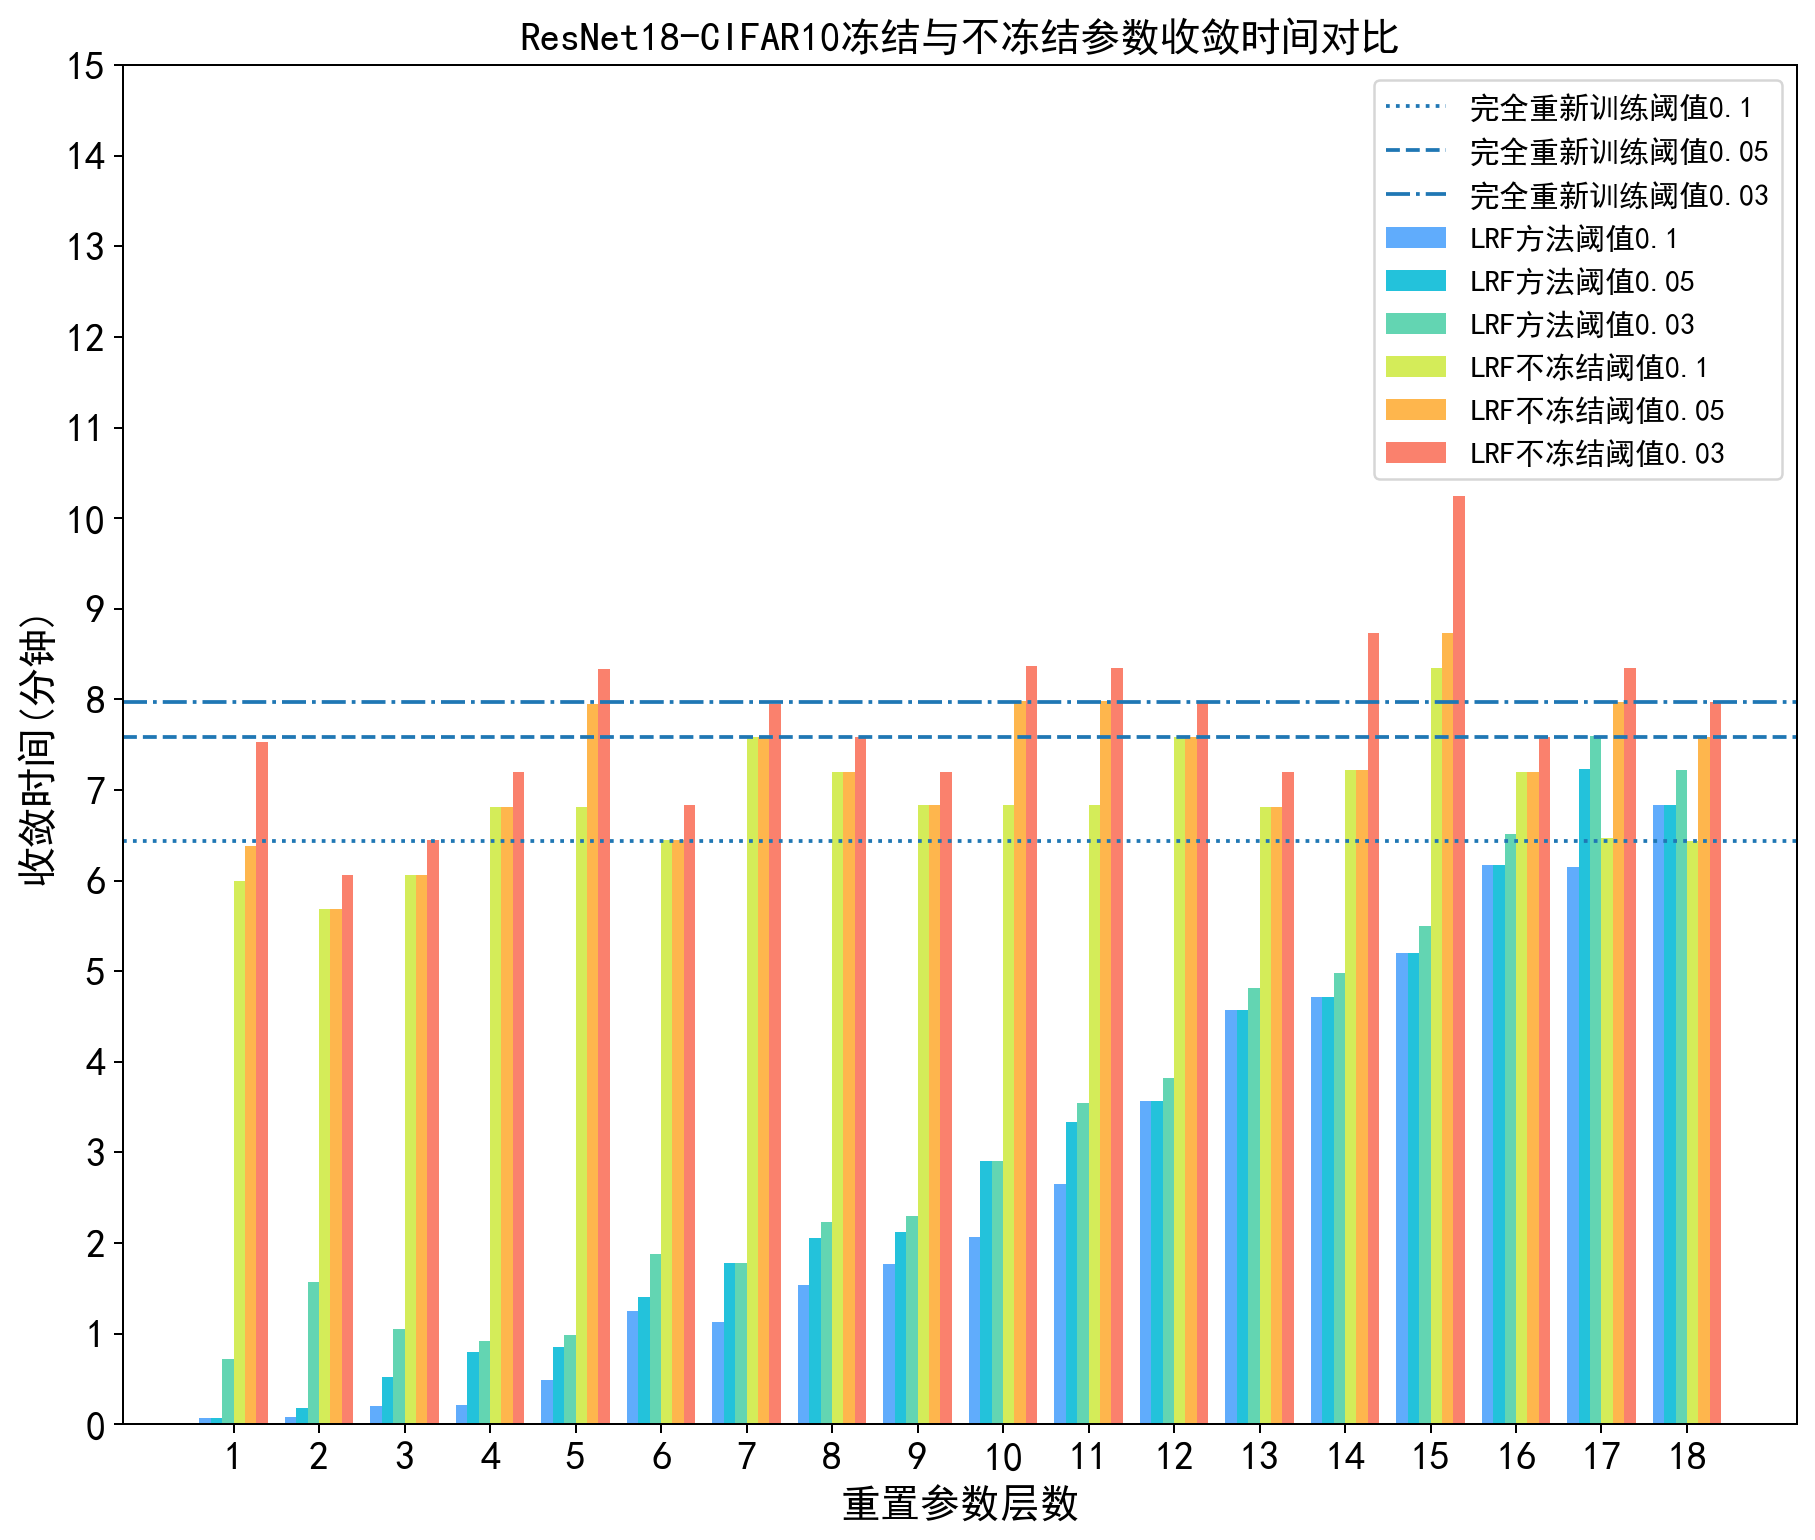

In [13]:
# resnet18 cifar LRF冻结与不冻结参数收敛时间对比
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10冻结与不冻结参数收敛时间对比", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']

resnet_cifar_retrain_time = ['2021-04-09 19:01:54','2021-04-09 19:08:20','2021-04-09 19:09:29','2021-04-09 19:09:52']

resnet_cifar_lrf_time = [
    ['2021-03-22 14:25:05','2021-03-22 14:25:09','2021-03-22 14:25:09','2021-03-22 14:25:48'],
    ['2021-03-22 14:27:53','2021-03-22 14:27:58','2021-03-22 14:28:04','2021-03-22 14:29:27'],
    ['2021-03-22 14:30:52','2021-03-22 14:31:04','2021-03-22 14:31:23','2021-03-22 14:31:55'],
    ['2021-03-22 14:34:04','2021-03-22 14:34:17','2021-03-22 14:34:52','2021-03-22 14:34:59'],
    ['2021-03-22 14:37:33','2021-03-22 14:38:02','2021-03-22 14:38:24','2021-03-22 14:38:32'],
    ['2021-03-22 14:41:16','2021-03-22 14:42:31','2021-03-22 14:42:40','2021-03-22 14:43:09'],
    ['2021-03-22 14:46:01','2021-03-22 14:47:09','2021-03-22 14:47:48','2021-03-22 14:47:48'],
    ['2021-03-22 14:50:56','2021-03-22 14:52:28','2021-03-22 14:52:59','2021-03-22 14:53:10'],
    ['2021-03-22 14:56:07','2021-03-22 14:57:53','2021-03-22 14:58:14','2021-03-22 14:58:25'],
    ['2021-03-22 15:01:29','2021-03-22 15:03:33','2021-03-22 15:04:23','2021-03-22 15:04:23'],
    ['2021-03-22 15:07:45','2021-03-22 15:10:24','2021-03-22 15:11:05','2021-03-22 15:11:18'],
    ['2021-03-22 15:14:26','2021-03-22 15:18:00','2021-03-22 15:18:00','2021-03-22 15:18:15'],
    ['2021-07-10 19:31:13','2021-07-10 19:35:47','2021-07-10 19:35:47','2021-07-10 19:36:02'],
    ['2021-03-22 15:29:01','2021-03-22 15:33:44','2021-03-22 15:33:44','2021-03-22 15:34:00'],
    ['2021-03-22 15:37:22','2021-03-22 15:42:34','2021-03-22 15:42:34','2021-03-22 15:42:52'],
    ['2021-07-10 19:36:19','2021-07-10 19:42:29','2021-07-10 19:42:29','2021-07-10 19:42:50'],
    ['2021-03-22 15:56:37','2021-03-22 16:02:46','2021-03-22 16:03:51','2021-03-22 16:04:13'],
    ['2021-03-22 16:07:30','2021-03-22 16:14:20','2021-03-22 16:14:20','2021-03-22 16:14:43'],
]

resnet_cifar_no_freeze_time = [
    ['2021-04-09 15:48:03','2021-04-09 15:54:03','2021-04-09 15:54:26','2021-04-09 15:55:35'],
    ['2021-04-09 15:59:24','2021-04-09 16:05:05','2021-04-09 16:05:05','2021-04-09 16:05:28'],
    ['2021-04-09 16:10:48','2021-04-09 16:16:52','2021-04-09 16:16:52','2021-04-09 16:17:15'],
    ['2021-04-09 16:22:13','2021-04-09 16:29:02','2021-04-09 16:29:02','2021-04-09 16:29:25'],
    ['2021-04-09 16:33:37','2021-04-09 16:40:26','2021-04-09 16:41:34','2021-04-09 16:41:57'],
    ['2021-04-09 16:45:00','2021-04-09 16:51:27','2021-04-09 16:51:27','2021-04-09 16:51:50'],
    ['2021-04-09 16:56:25','2021-04-09 17:04:00','2021-04-09 17:04:00','2021-04-09 17:04:22'],
    ['2021-04-09 17:07:49','2021-04-09 17:15:01','2021-04-09 17:15:01','2021-04-09 17:15:24'],
    ['2021-04-09 17:19:13','2021-04-09 17:26:03','2021-04-09 17:26:03','2021-04-09 17:26:25'],
    ['2021-04-09 17:30:37','2021-04-09 17:37:27','2021-04-09 17:38:36','2021-04-09 17:38:59'],
    ['2021-04-09 17:42:02','2021-04-09 17:48:52','2021-04-09 17:50:01','2021-04-09 17:50:23'],
    ['2021-04-09 17:53:27','2021-04-09 18:01:02','2021-04-09 18:01:02','2021-04-09 18:01:25'],
    ['2021-04-09 18:04:52','2021-04-09 18:11:41','2021-04-09 18:11:41','2021-04-09 18:12:04'],
    ['2021-04-09 18:16:16','2021-04-09 18:23:29','2021-04-09 18:23:29','2021-04-09 18:25:00'],
    ['2021-04-09 18:27:40','2021-04-09 18:36:01','2021-04-09 18:36:24','2021-04-09 18:37:55'],
    ['2021-04-09 18:39:05','2021-04-09 18:46:17','2021-04-09 18:46:17','2021-04-09 18:46:40'],
    ['2021-04-09 18:50:29','2021-04-09 18:56:57','2021-04-09 18:58:27','2021-04-09 18:58:50'],
    ['2021-04-09 19:01:54','2021-04-09 19:08:20','2021-04-09 19:09:29','2021-04-09 19:09:52'],
]

times01 = []
times005 = []
times003 = []
noFreezeTimes01 = []
noFreezeTimes005 = []
noFreezeTimes003 = []
spanS = []
size = len(resnet_cifar_lrf_time)
for i in range(size):
    time1 = datetime.strptime(resnet_cifar_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

    time1 = datetime.strptime(resnet_cifar_no_freeze_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_no_freeze_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_no_freeze_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_no_freeze_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    noFreezeTimes01.append(timeDelta1.seconds / 60)
    noFreezeTimes005.append(timeDelta2.seconds / 60)
    noFreezeTimes003.append(timeDelta3.seconds / 60)

retrainTime1 = datetime.strptime(resnet_cifar_retrain_time[0], "%Y-%m-%d %H:%M:%S")
retrainTime2 = datetime.strptime(resnet_cifar_retrain_time[1], "%Y-%m-%d %H:%M:%S")
retrainTime3 = datetime.strptime(resnet_cifar_retrain_time[2], "%Y-%m-%d %H:%M:%S")
retrainTime4 = datetime.strptime(resnet_cifar_retrain_time[3], "%Y-%m-%d %H:%M:%S")
timeDelta1 = retrainTime2 - retrainTime1
timeDelta2 = retrainTime3 - retrainTime1
timeDelta3 = retrainTime4 - retrainTime1


x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)
d = np.array(noFreezeTimes01)
e = np.array(noFreezeTimes005)
f = np.array(noFreezeTimes003)

total_width, n = 0.8, 6
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1', color='#60ACFC')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05', color='#23C2DB')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03', color='#63D5B2')
plt.bar(x + 3 * width, d,  width=width, label='LRF不冻结阈值0.1', color='#D4EC59')
plt.bar(x + 4 * width, e, width=width, label='LRF不冻结阈值0.05', color='#FEB64D')
plt.bar(x + 5 * width, f, width=width, label='LRF不冻结阈值0.03', color='#FA816D')
plt.axhline(y=timeDelta1.seconds / 60, linestyle='dotted', label='完全重新训练阈值0.1')
plt.axhline(y=timeDelta2.seconds / 60, linestyle='dashed', label='完全重新训练阈值0.05')
plt.axhline(y=timeDelta3.seconds / 60, linestyle='dashdot', label='完全重新训练阈值0.03')
plt.xticks(np.linspace(1,18,18,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,15,16,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_resnetcifar_lrf_no_freeze_time.png",dpi=272)
plt.show()

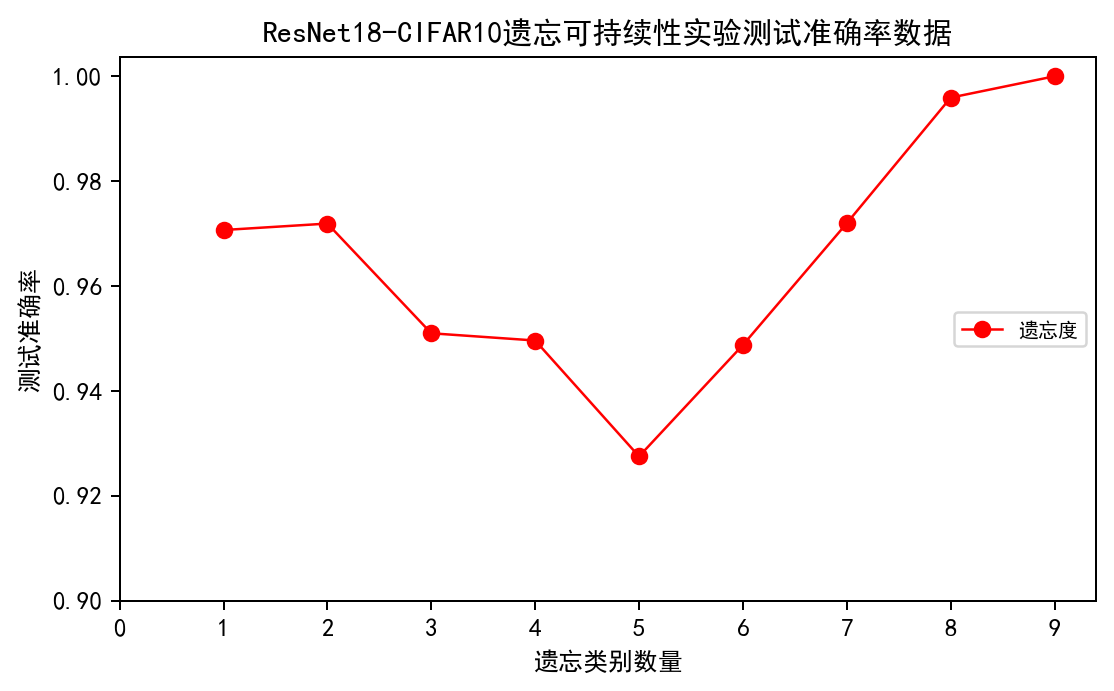

In [14]:
# resnet18 cifar LRF持续遗忘遗忘度
import numpy as np
import matplotlib.pyplot as plt
from common.utils import calcSingleForgetPercent

# plt.figure(figsize=(8,5), dpi=80)
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('遗忘类别数量')  # Add an x-label to the axes.
ax.set_ylabel('测试准确率')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘可持续性实验测试准确率数据")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 9, 9, endpoint=True)
continuous_check_finetuning_forget_acc = [
    0,0,0,0,0,0,0,0,0,
]
continuous_check_finetuning_retain_acc = [
    89.378,89.225,89.629,89.667,93.240,
    94.400,96.667,98.600,100.000,
]
continuous_check_retrain_forget_acc = [
    0,0,0,0,0,0,0,0,0,
]
continuous_check_retrain_retain_acc = [
    86.833,86.788,85.443,85.367,86.940,
    89.800,94.033,98.200,100.000,
]

F = []
for i in range(len(continuous_check_finetuning_retain_acc)):
    F.append(calcSingleForgetPercent(
        continuous_check_finetuning_forget_acc[i],
        continuous_check_finetuning_retain_acc[i],
        continuous_check_retrain_forget_acc[i],
        continuous_check_retrain_retain_acc[i],
    ))

plt.plot(X, F,  marker='o',linewidth=1, linestyle="solid", color='r', label="遗忘度")
plt.xticks(np.linspace(0,9,10,endpoint=True))
plt.yticks(np.linspace(0.9,1,6,endpoint=True))

plt.legend(loc='center right',fontsize=8, frameon=True)
plt.savefig("./figures/chapter4_resnetcifar_continuous_check_forget_percent.png",dpi=272)
plt.show()

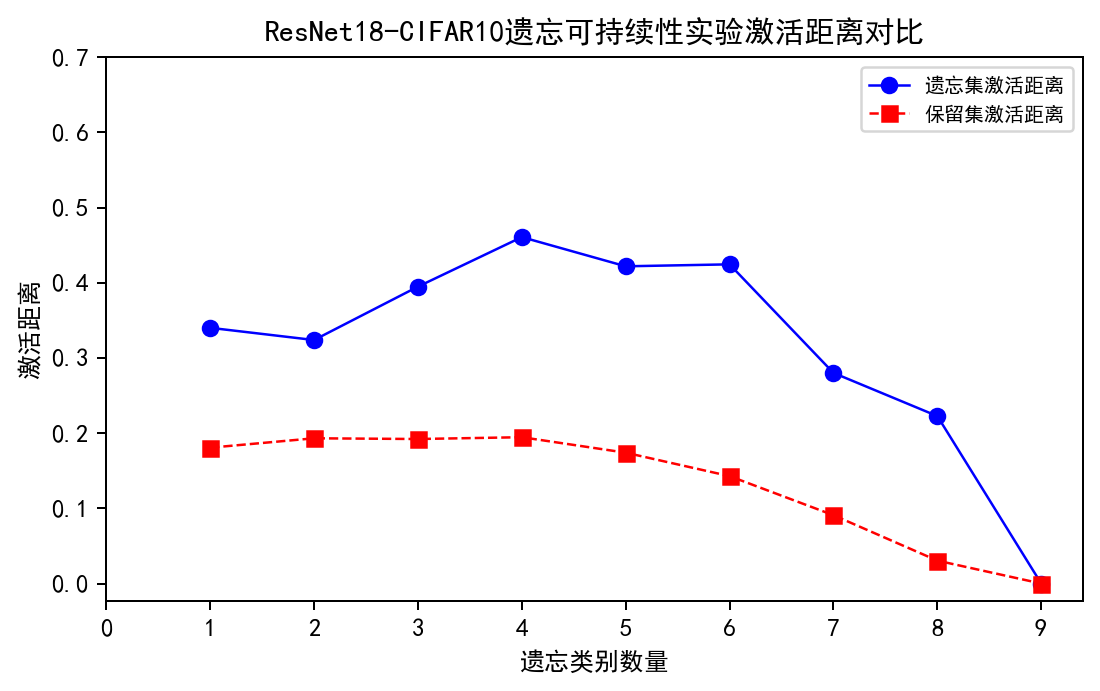

In [17]:
# ResNet18 CIFAR10持续遗忘激活距离
# plt.figure(figsize=(8,5), dpi=80)
plt.figure(figsize=(7,4), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('遗忘类别数量')  # Add an x-label to the axes.
ax.set_ylabel('激活距离')  # Add a y-label to the axes.
ax.set_title("ResNet18-CIFAR10遗忘可持续性实验激活距离对比")  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']
X = np.linspace(1, 9, 9, endpoint=True)
continuous_check_active_distance_forget_norm2 = [
    0.34013330,0.32389718,0.39489185,0.46079578,0.42195533,
    0.42455205,0.28013480,0.22271512,0.00000000,
]
continuous_check_active_distance_retain_norm2 = [
    0.18069779,0.19319118,0.19222998,0.19463237,0.17404851,
    0.14287744,0.09089778,0.03047160,0.00000000,
]
C = np.array(continuous_check_active_distance_forget_norm2)
S = np.array(continuous_check_active_distance_retain_norm2)
plt.plot(X, C, 'o',linewidth=1, linestyle="solid", label="遗忘集激活距离", color='b')
plt.plot(X, S, 's',linewidth=1, linestyle="dashed", label="保留集激活距离", color='r')
plt.xticks(np.linspace(0,9,10,endpoint=True))
plt.yticks(np.linspace(0,0.7,8,endpoint=True))

plt.legend(fontsize=8)
plt.savefig("./figures/chapter4_resnetcifar_continuous_check_distance.png",dpi=272)
plt.show()

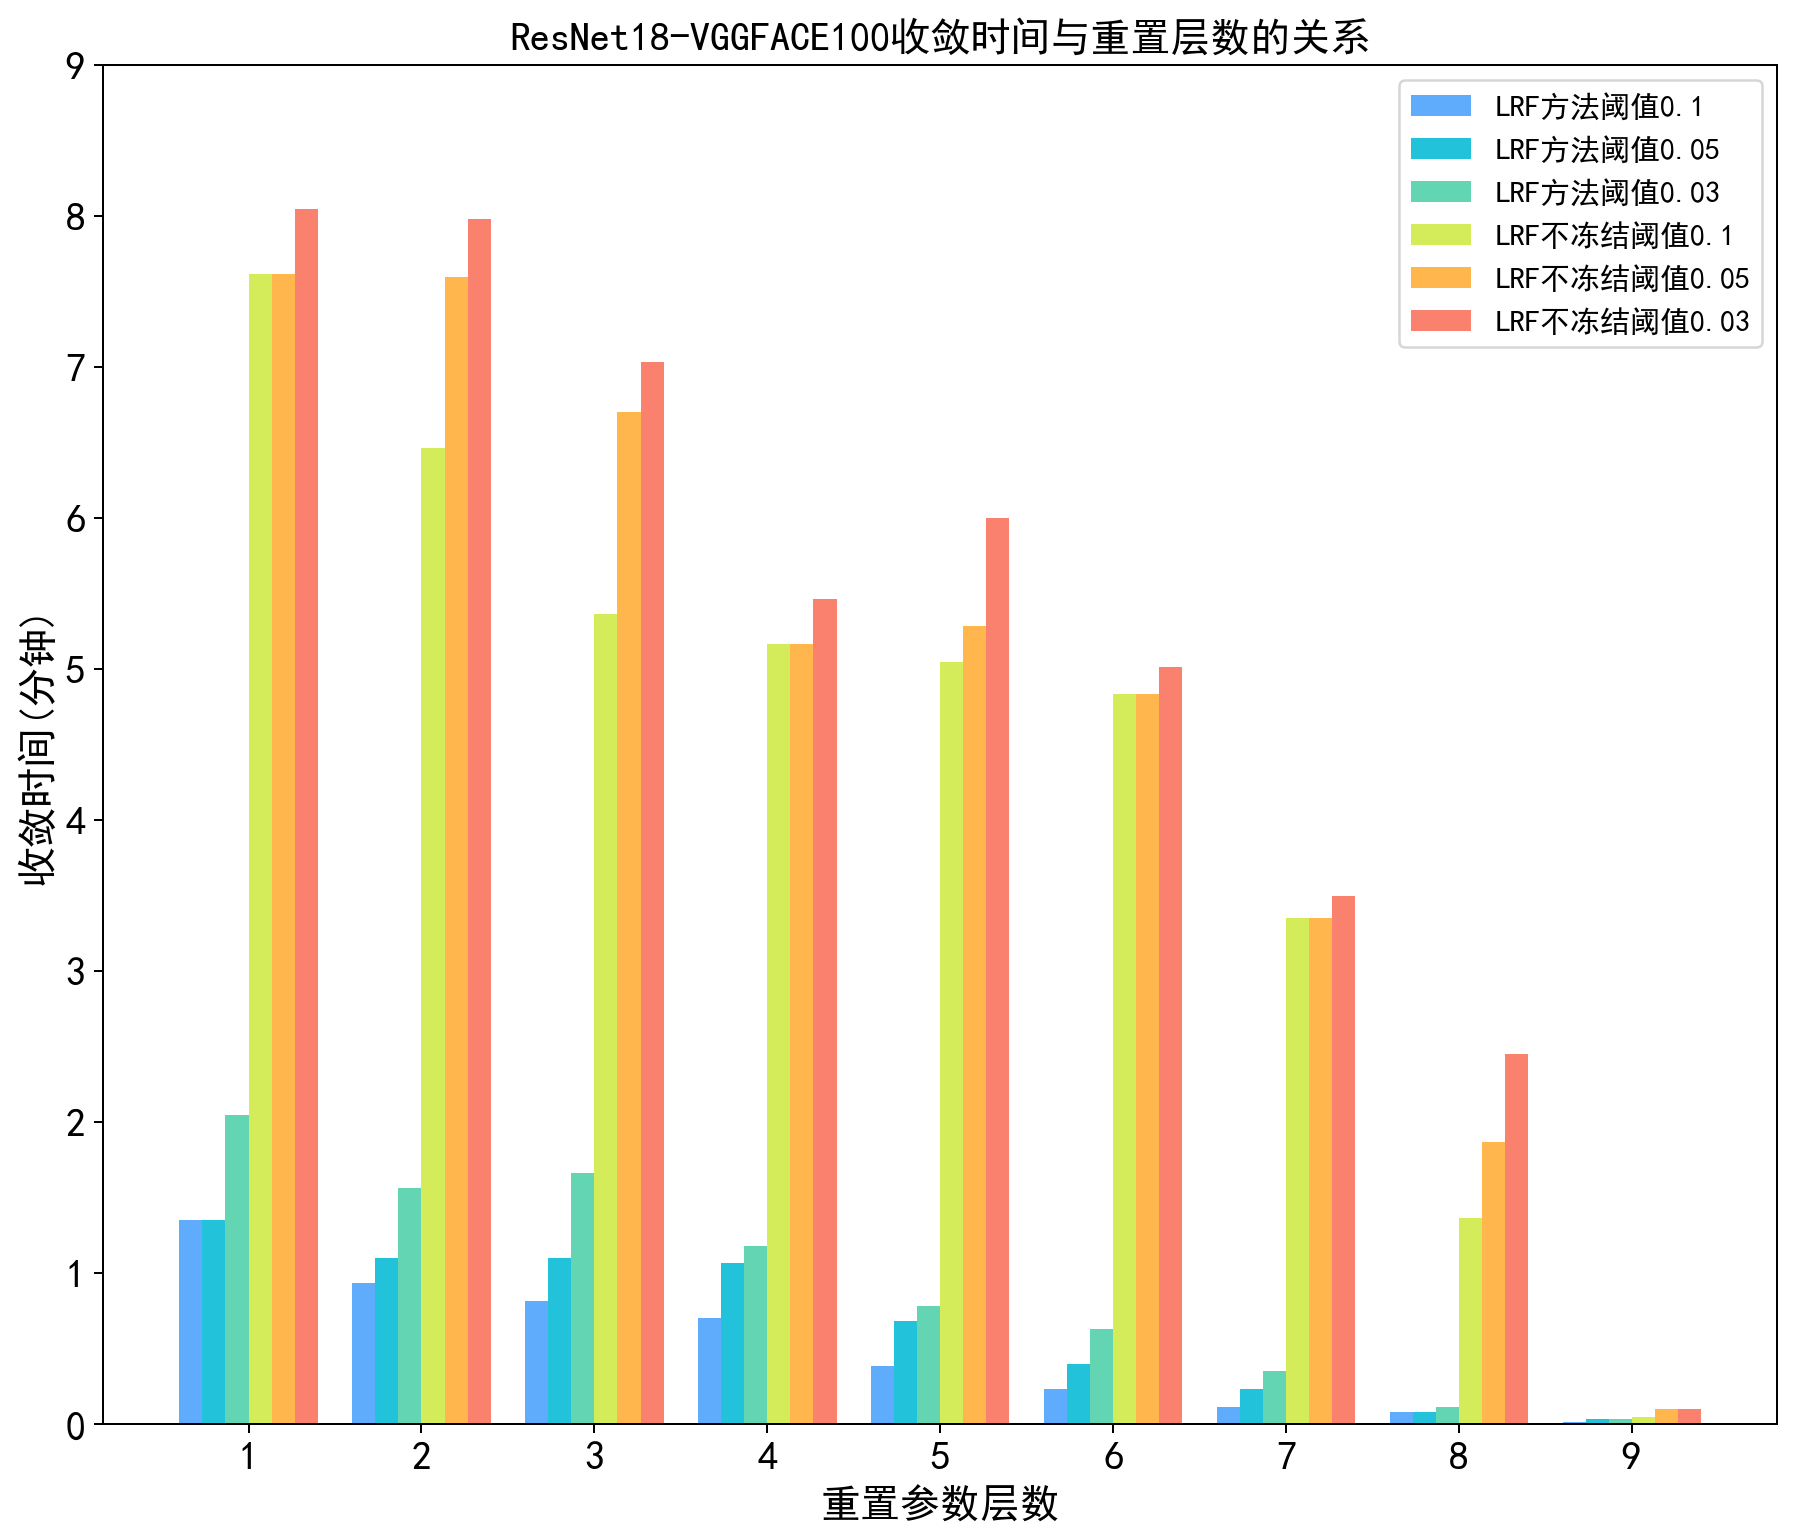

In [20]:
# resnet18 cifar10持续遗忘收敛时间曲线
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(12,10), dpi=180)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlabel('重置参数层数', fontsize=16)  # Add an x-label to the axes.
ax.set_ylabel('收敛时间(分钟)', fontsize=16)  # Add a y-label to the axes.
ax.set_title("ResNet18-VGGFACE100收敛时间与重置层数的关系", fontsize=16)  # Add a title to the axes.
plt.rcParams['font.family']=['SimHei']#关键是这句
# plt.rcParams['font.family']=['Arial Unicode MS']

resnet_cifar_continuous_check_lrf_time = [
    ['2021-04-08 10:31:20','2021-04-08 10:32:41','2021-04-08 10:32:41','2021-04-08 10:33:23'],
    ['2021-04-08 10:36:57','2021-04-08 10:37:53','2021-04-08 10:38:03','2021-04-08 10:38:31'],
    ['2021-04-08 10:42:06','2021-04-08 10:42:55','2021-04-08 10:43:12','2021-04-08 10:43:46'],
    ['2021-04-08 10:46:39','2021-04-08 10:47:21','2021-04-08 10:47:43','2021-04-08 10:47:50'],
    ['2021-04-08 10:50:37','2021-04-08 10:51:00','2021-04-08 10:51:18','2021-04-08 10:51:24'],
    ['2021-04-08 10:53:56','2021-04-08 10:54:10','2021-04-08 10:54:20','2021-04-08 10:54:34'],
    ['2021-04-08 10:56:40','2021-04-08 10:56:47','2021-04-08 10:56:54','2021-04-08 10:57:01'],
    ['2021-04-08 10:58:46','2021-04-08 10:58:51','2021-04-08 10:58:51','2021-04-08 10:58:53'],
    ['2021-04-08 11:00:16','2021-04-08 11:00:17','2021-04-08 11:00:18','2021-04-08 11:00:18'],
]

resnet_cifar_continuous_check_retrain_time = [
    ['2021-04-08 11:40:57','2021-04-08 11:48:34','2021-04-08 11:48:34', '2021-04-08 11:49:00'],
    ['2021-04-08 11:54:04','2021-04-08 12:00:32','2021-04-08 12:01:40', '2021-04-08 12:02:03'],
    ['2021-04-08 12:05:51','2021-04-08 12:11:13','2021-04-08 12:12:33', '2021-04-08 12:12:53'],
    ['2021-04-08 12:16:15','2021-04-08 12:21:25','2021-04-08 12:21:25', '2021-04-08 12:21:43'],
    ['2021-04-08 12:25:13','2021-04-08 12:30:16','2021-04-08 12:30:30', '2021-04-08 12:31:13'],
    ['2021-04-08 12:32:44','2021-04-08 12:37:34','2021-04-08 12:37:34', '2021-04-08 12:37:45'],
    ['2021-04-08 12:38:49','2021-04-08 12:42:10','2021-04-08 12:42:10', '2021-04-08 12:42:19'],
    ['2021-04-08 12:43:27','2021-04-08 12:44:49','2021-04-08 12:45:19', '2021-04-08 12:45:54'],
    ['2021-04-08 12:46:38','2021-04-08 12:46:41','2021-04-08 12:46:44', '2021-04-08 12:46:44'],
]

times01 = []
times005 = []
times003 = []
noFreezeTimes01 = []
noFreezeTimes005 = []
noFreezeTimes003 = []
spanS = []
size = len(resnet_cifar_continuous_check_lrf_time)
for i in range(size):
    time1 = datetime.strptime(resnet_cifar_continuous_check_lrf_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_continuous_check_lrf_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_continuous_check_lrf_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_continuous_check_lrf_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    times01.append(timeDelta1.seconds / 60)
    times005.append(timeDelta2.seconds / 60)
    times003.append(timeDelta3.seconds / 60)

    time1 = datetime.strptime(resnet_cifar_continuous_check_retrain_time[i][0], "%Y-%m-%d %H:%M:%S")
    time2 = datetime.strptime(resnet_cifar_continuous_check_retrain_time[i][1], "%Y-%m-%d %H:%M:%S")
    time3 = datetime.strptime(resnet_cifar_continuous_check_retrain_time[i][2], "%Y-%m-%d %H:%M:%S")
    time4 = datetime.strptime(resnet_cifar_continuous_check_retrain_time[i][3], "%Y-%m-%d %H:%M:%S")
    timeDelta1 = time2 - time1
    timeDelta2 = time3 - time1
    timeDelta3 = time4 - time1
    noFreezeTimes01.append(timeDelta1.seconds / 60)
    noFreezeTimes005.append(timeDelta2.seconds / 60)
    noFreezeTimes003.append(timeDelta3.seconds / 60)

x = np.arange(size)
x = np.add(x, np.array([1]))
a = np.array(times01)
b = np.array(times005)
c = np.array(times003)
d = np.array(noFreezeTimes01)
e = np.array(noFreezeTimes005)
f = np.array(noFreezeTimes003)

total_width, n = 0.8, 6
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='LRF方法阈值0.1', color='#60ACFC')
plt.bar(x + width, b, width=width, label='LRF方法阈值0.05', color='#23C2DB')
plt.bar(x + 2 * width, c, width=width, label='LRF方法阈值0.03', color='#63D5B2')
plt.bar(x + 3 * width, d,  width=width, label='LRF不冻结阈值0.1', color='#D4EC59')
plt.bar(x + 4 * width, e, width=width, label='LRF不冻结阈值0.05', color='#FEB64D')
plt.bar(x + 5 * width, f, width=width, label='LRF不冻结阈值0.03', color='#FA816D')
plt.xticks(np.linspace(1,9,9,endpoint=True), fontsize=16)
plt.yticks(np.linspace(0,9,10,endpoint=True), fontsize=16)
plt.legend(fontsize=12)
plt.savefig("./figures/chapter4_resnetcifar_continuous_check_time.png",dpi=272)
plt.show()